In [ ]:
%pip install numpy --upgrade

In [3]:
import pandas as pd

df = pd.read_csv('data/data.csv')
df.head(100)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,alfa-romeo,Alfa Romeo 147,grey,07/2003,2003,3800,110,150,Automatic,Petrol,"8,9 l/100 km",211 g/km,80000.0,2.0 Twin Spark Selespeed Distinctive
96,96,alfa-romeo,Alfa Romeo Alfa 6,grey,05/2003,2003,2499,77,105,Manual,Petrol,"8,1 l/100 km",192 g/km,100000.0,1.6 T.Spark ECO Progression
97,97,alfa-romeo,Alfa Romeo 156,grey,02/2003,2003,1250,110,150,Manual,Diesel,"6,7 l/100 km",- (g/km),232800.0,156 Sportwagon 2.4 JTD
98,98,alfa-romeo,Alfa Romeo 147,black,01/2003,2003,17500,184,250,Manual,Petrol,"12,1 l/100 km",287 g/km,138500.0,3.2 V6 24V GTA Sammlerstück


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

color                         166
registration_date               4
power_kw                      136
power_ps                      130
fuel_consumption_l_100km    26884
fuel_consumption_g_km       35809
mileage_in_km                 152
offer_description               1
dtype: int64


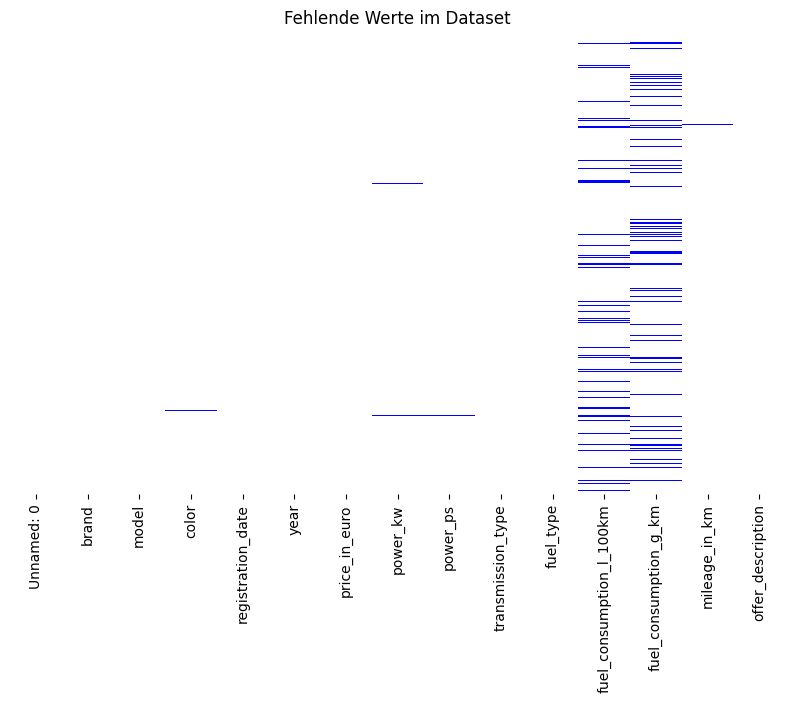

In [7]:
import numpy as np
# Alle Einträge -(g/km) mit NaN ersetzen
df.replace("- (g/km)", np.nan, inplace=True)
# Anzahl fehlender Werte pro Spalte
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Nur Spalten mit fehlenden Werten anzeigen

# Visualisierung fehlender Werte (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap=["white", "blue"], cbar=False, yticklabels=False)
plt.title("Fehlende Werte im Dataset")
plt.show()

In [8]:
# Untersuchen von power_kw und power_ps --> NaN Values in selben Einträgen?
missing_power = df[df["power_kw"].isna() & df["power_ps"].isna()]
count_power = missing_power.shape[0]

# Untersuchen von fuel_consumption_l_100km und fuel_consumption_g_km --> NaN Values in selben Einträgen?
missing_fuel = df[df["fuel_consumption_l_100km"].isna() & df["fuel_consumption_g_km"].isna()]
count_fuel = missing_fuel.shape[0]


print(f"Anzahl der Zeilen, in denen überhaupt keine Power (weder PS noch KW) angegebn sind: {count_power}")
print(f"Anzahl der Zeilen, in denen überhaupt kein Kraftverbrauch angegeben ist: {count_fuel}")

Anzahl der Zeilen, in denen überhaupt keine Power (weder PS noch KW) angegebn sind: 128
Anzahl der Zeilen, in denen überhaupt kein Kraftverbrauch angegeben ist: 13198


***Verteilungen, die interessant wären:***  
- Häufigkeiten pro Marke
- Häufigkeiten pro Model
- Häufigkeiten pro Color
- Häufigkeiten nach Jahr der Registrierung
- Häufigkeiten nach Preis, gruppiert nach Marke
- Häufigkeiten nach Anzahl Kilometer, kombiniert mit Alter?
- Häufigkeiten nach Power, gruppiert nach Marke
- Häufigkeiten nach Schlagwörtern in offer-description, z.B. Cabrio etc.
- Häufigkeiten nach Transmission Type, gruppiert nach Marke?

In [12]:
"""from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Profiling Report Gebrauchtwagenset')
profile.to_file("profile_report_gebrauchtwagen.html")"""

'from ydata_profiling import ProfileReport\n\nprofile = ProfileReport(df, title=\'Profiling Report Gebrauchtwagenset\')\nprofile.to_file("profile_report_gebrauchtwagen.html")'

brand
volkswagen       33281
mercedes-benz    27226
audi             21161
opel             20388
bmw              19810
ford             18790
skoda            14039
seat             11949
renault           8694
toyota            8228
hyundai           6989
peugeot           5848
kia               5734
fiat              5039
mini              4295
mazda             4211
volvo             4164
citroen           4083
porsche           3958
nissan            3784
dacia             3367
land-rover        3073
jeep              1749
smart             1643
alfa-romeo        1437
jaguar            1398
mitsubishi         934
honda              785
maserati           698
dodge              669
ferrari            590
bentley            541
lamborghini        361
ssangyong          342
aston-martin       277
saab               233
isuzu              206
daihatsu           204
chevrolet          191
lada               191
cadillac           157
infiniti           112
lancia             105
daewo

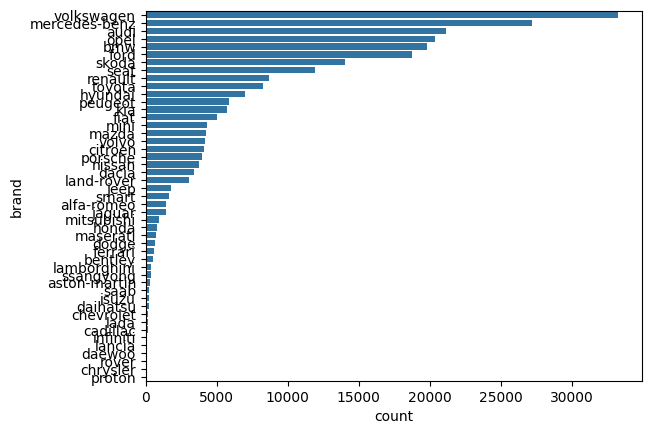

In [16]:
print(df["brand"].value_counts())  # Häufigkeiten anzeigen
sns.countplot(y=df["brand"], order=df["brand"].value_counts().index)
plt.show()

In [54]:
model_unter_5 = df['model'].value_counts()
model_unter_5 = model_unter_5[model_unter_5<5]
print(model_unter_5.index.unique())

Index(['Cadillac XT6', 'Cadillac CT6', 'Mercedes-Benz CL',
       'Mercedes-Benz SLC 250', 'Mercedes-Benz 320', 'Nissan NP300',
       'Nissan Interstar', 'BMW 128', 'Alfa Romeo 145', 'BMW 850',
       ...
       'Jaguar X-Type', 'Mercedes-Benz CL 220', 'BMW Active Hybrid 3',
       'Volkswagen Polo Sedan', 'Mercedes-Benz CE 220', 'BMW 130',
       'Mercedes-Benz S 250', 'Mercedes-Benz S 550', 'Volvo 940', 'Audi RS'],
      dtype='object', name='model', length=278)


In [110]:
df['preis_bereinigt'] = df['price_in_euro']
df['preis_bereinigt'] = df['preis_bereinigt'].dropna()
# Sicherstellen, dass alle Werte Strings sind
df['preis_bereinigt'] = df['preis_bereinigt'].astype(str)

# Alle nicht-numerischen Zeichen entfernen (z. B. Buchstaben, Sonderzeichen)
df['preis_bereinigt'] = df['preis_bereinigt'].str.replace(r"[^0-9,.-]", "", regex=True)

# Komma als Dezimaltrennzeichen in einen Punkt umwandeln (falls nötig)
df['preis_bereinigt'] = df['preis_bereinigt'].str.replace(",", ".")

# In float umwandeln, nicht umwandelbare Werte werden zu NaN
df['preis_bereinigt'] = pd.to_numeric(df['preis_bereinigt'], errors="coerce")

# NaN-Werte (nicht konvertierbare Werte) entfernen
df['preis_bereinigt'] = df['preis_bereinigt'].dropna()

# Ergebnis prüfen
print(df['preis_bereinigt'].dtype)  # Sollte jetzt float sein
print(df['preis_bereinigt'].head())  # Vorschau der bereinigten Werte

float64
0     1300.0
1    24900.0
2     5900.0
3     4900.0
4    17950.0
Name: preis_bereinigt, dtype: float64


In [112]:
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,preis_bereinigt
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB,1300.0
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,NaN,190000.0,"Q4 Allrad, 3.2L GTA",24900.0
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,NaN,129000.0,ALFA ROME 916,5900.0
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L,4900.0
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",NaN,96127.0,"3.0i Super V6, absoluter Topzustand !",17950.0


In [114]:
# Durchschnittspreis pro Marke berechnen
durchschnittspreise = df.groupby("brand")["preis_bereinigt"].mean()

print(durchschnittspreise)

brand
alfa-romeo        31265.130828
aston-martin     172583.144404
audi              28467.154061
bentley          188907.565619
bmw               25086.774899
cadillac          39653.726115
chevrolet         40798.780105
chrysler          59935.500000
citroen           19042.545076
dacia             15117.340761
daewoo             1933.098361
daihatsu           4014.997549
dodge             55004.742900
ferrari          280949.623729
fiat              15898.306593
ford              20406.575141
honda             24344.305732
hyundai           20585.334908
infiniti          23217.008929
isuzu             37336.859223
jaguar            45392.558655
jeep              36238.932533
kia               22604.430541
lada              12620.256545
lamborghini      371029.412742
lancia             7674.209524
land-rover        58797.943052
maserati          74702.508596
mazda             23432.361368
mercedes-benz     30731.211915
mini              21765.135506
mitsubishi        23126.501071
ni

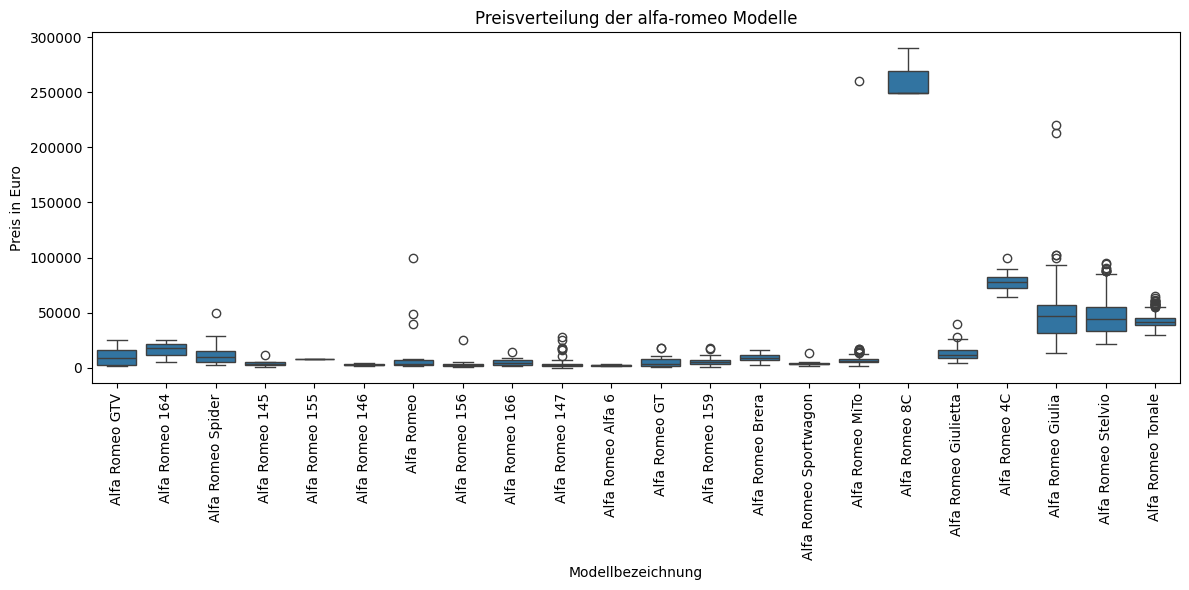

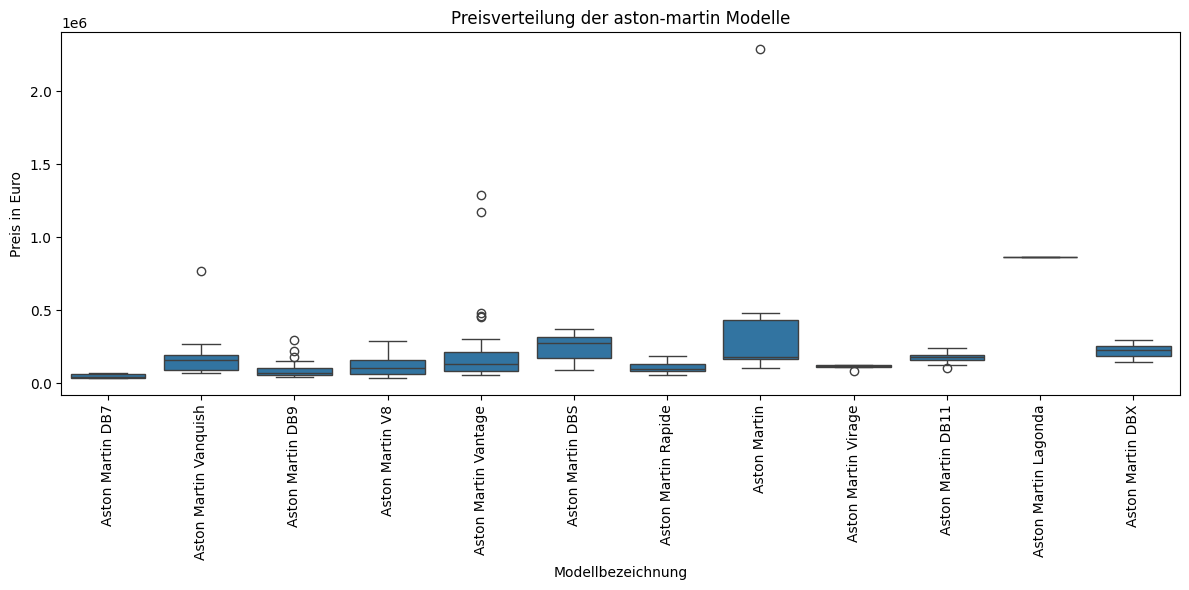

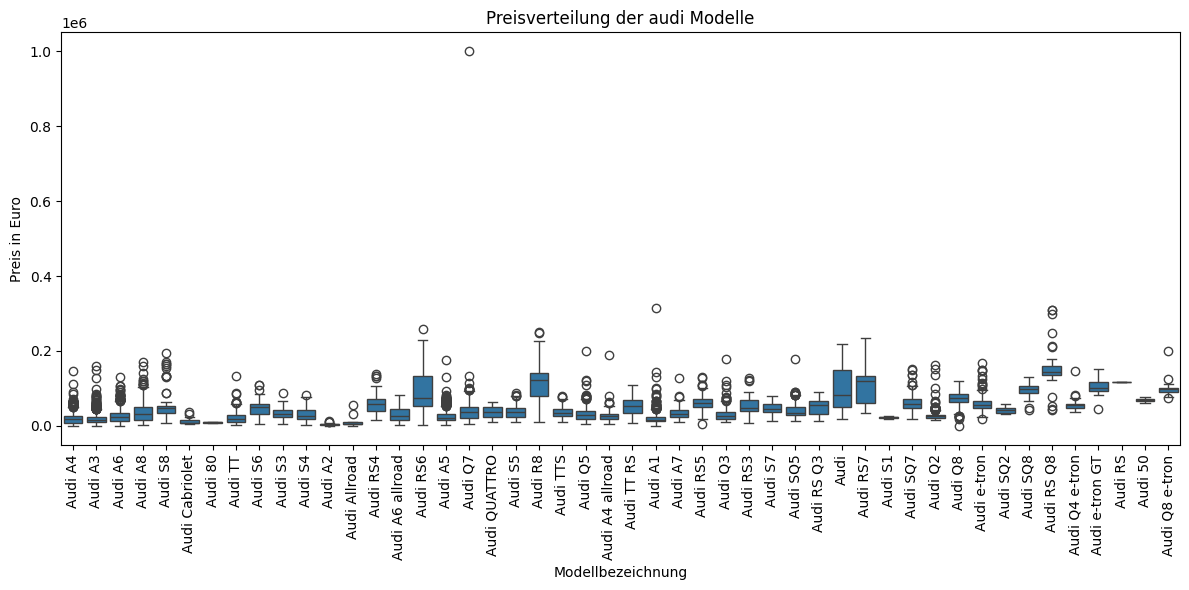

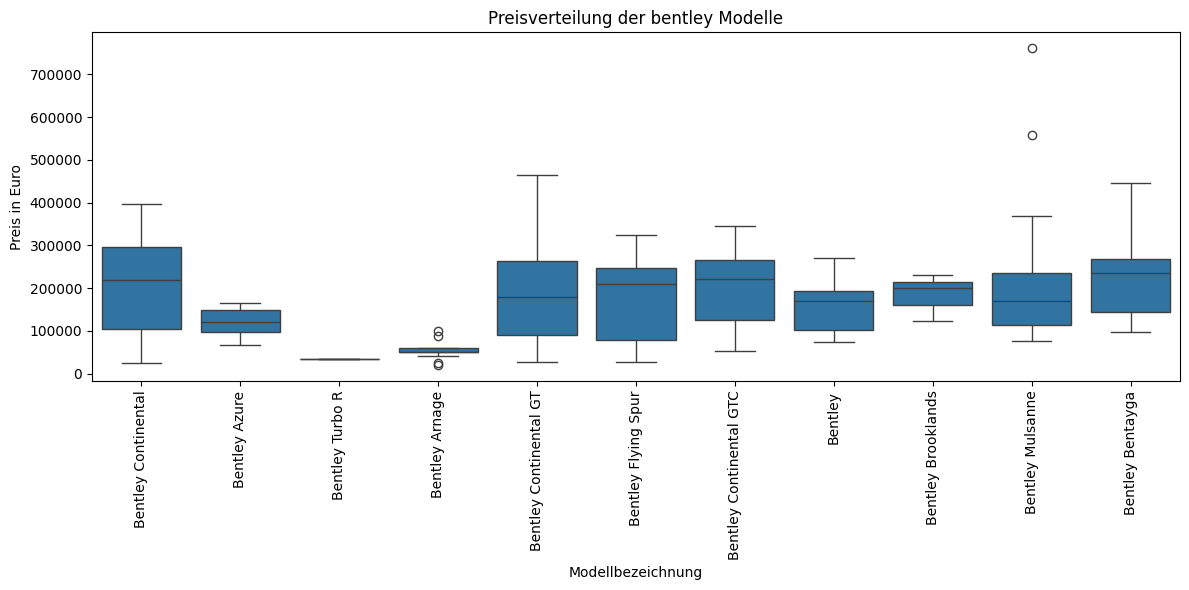

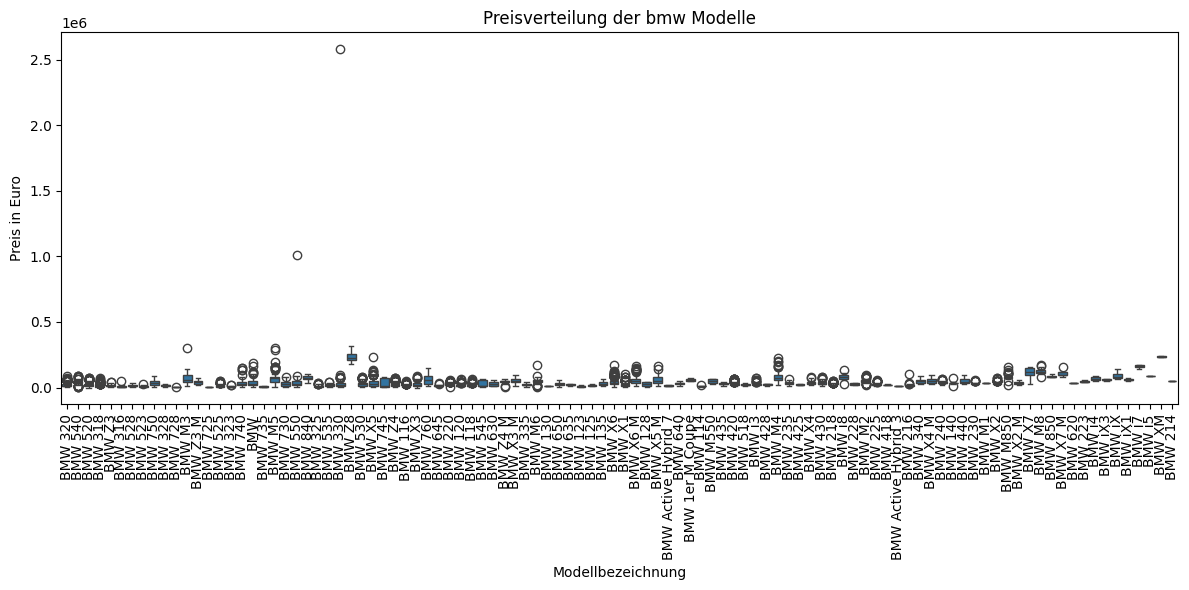

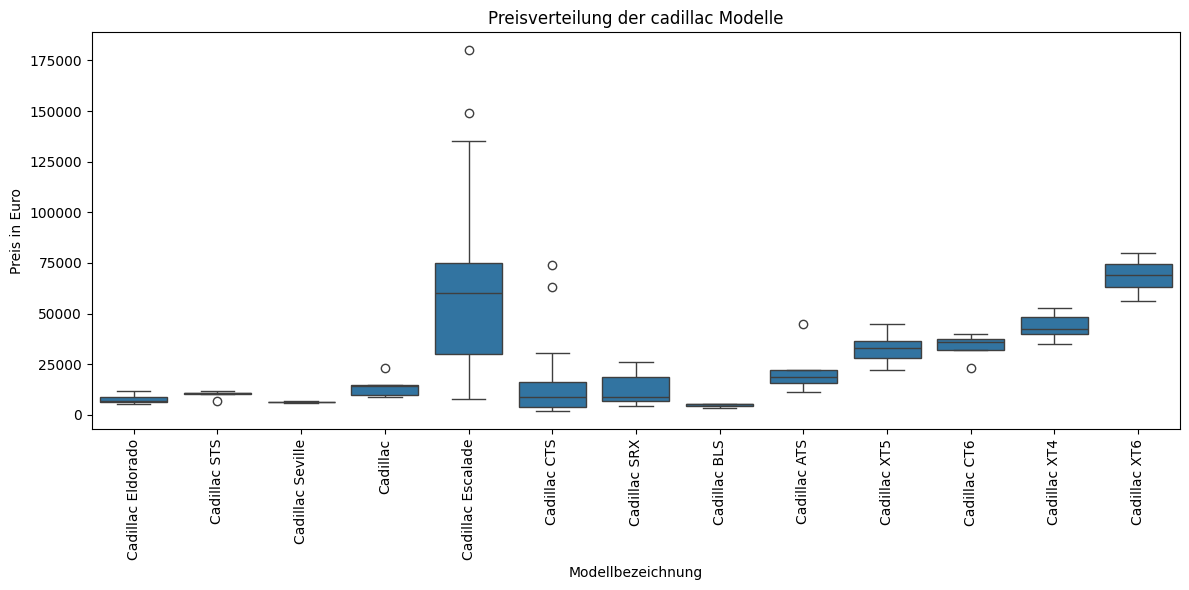

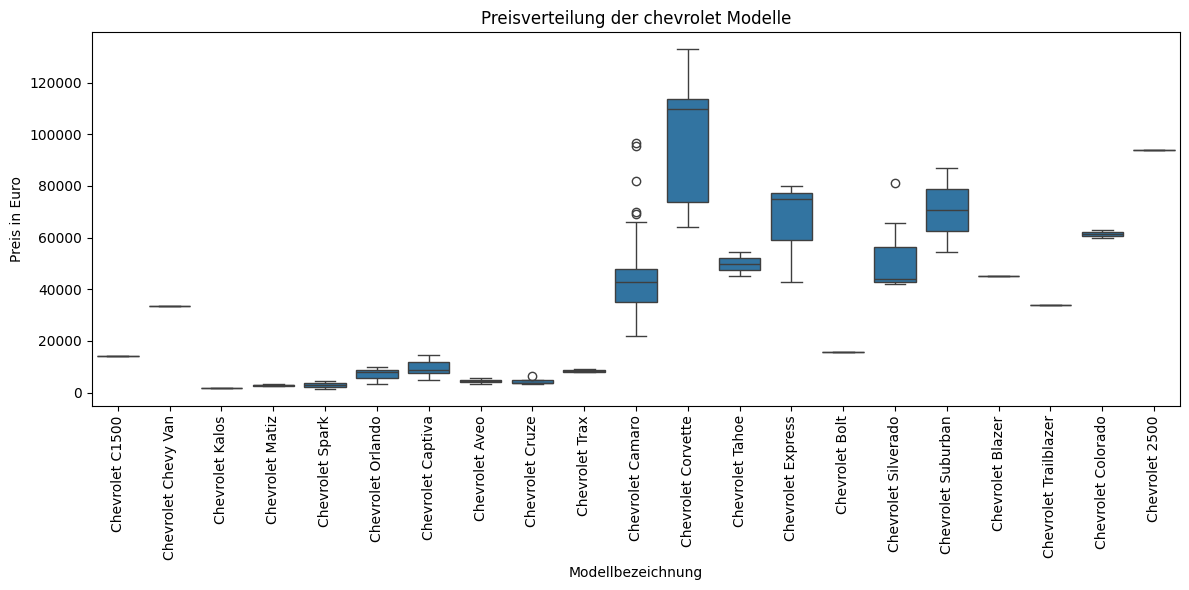

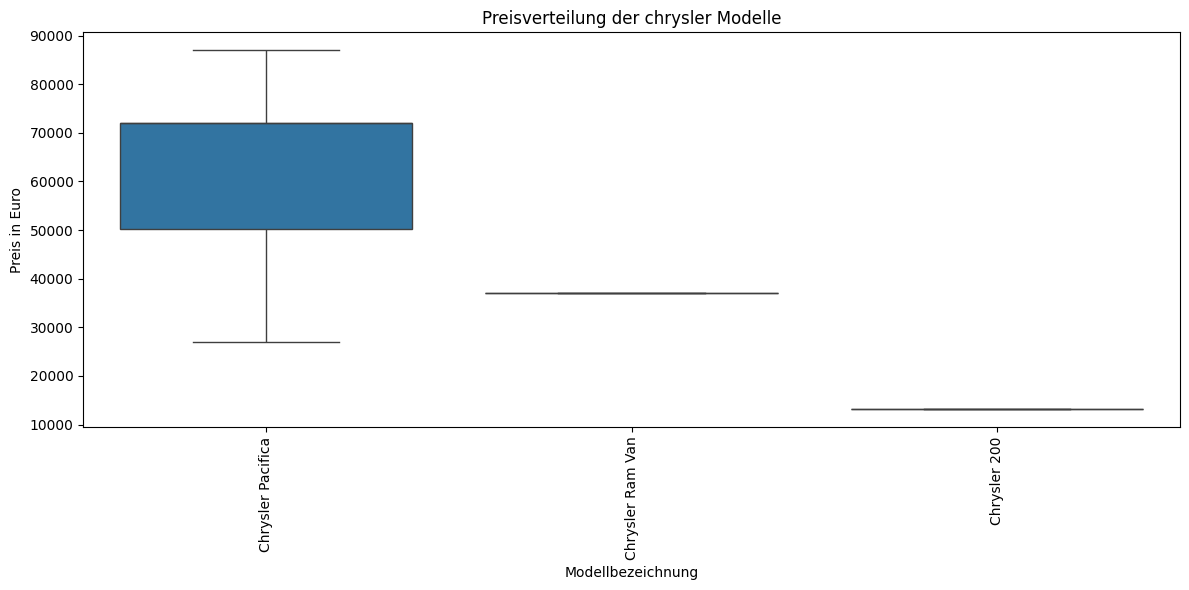

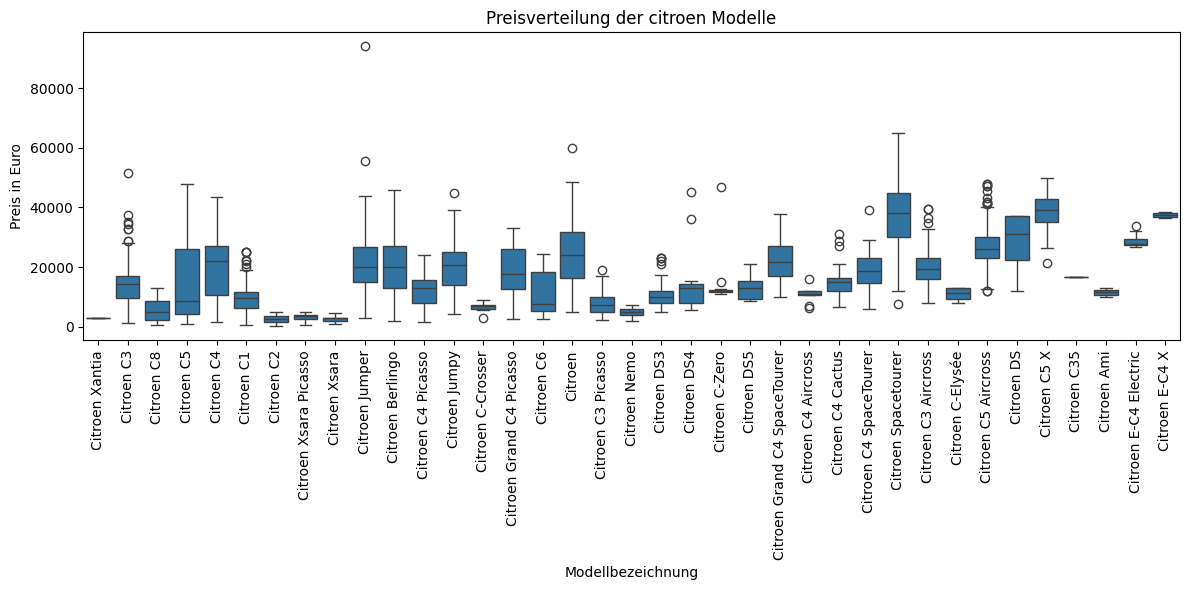

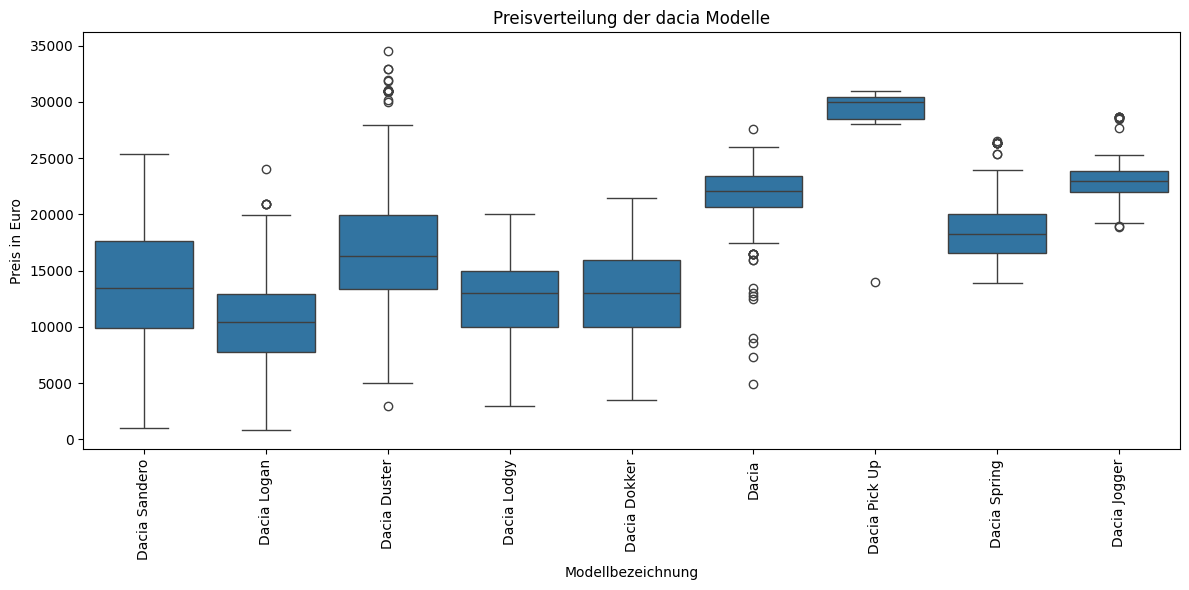

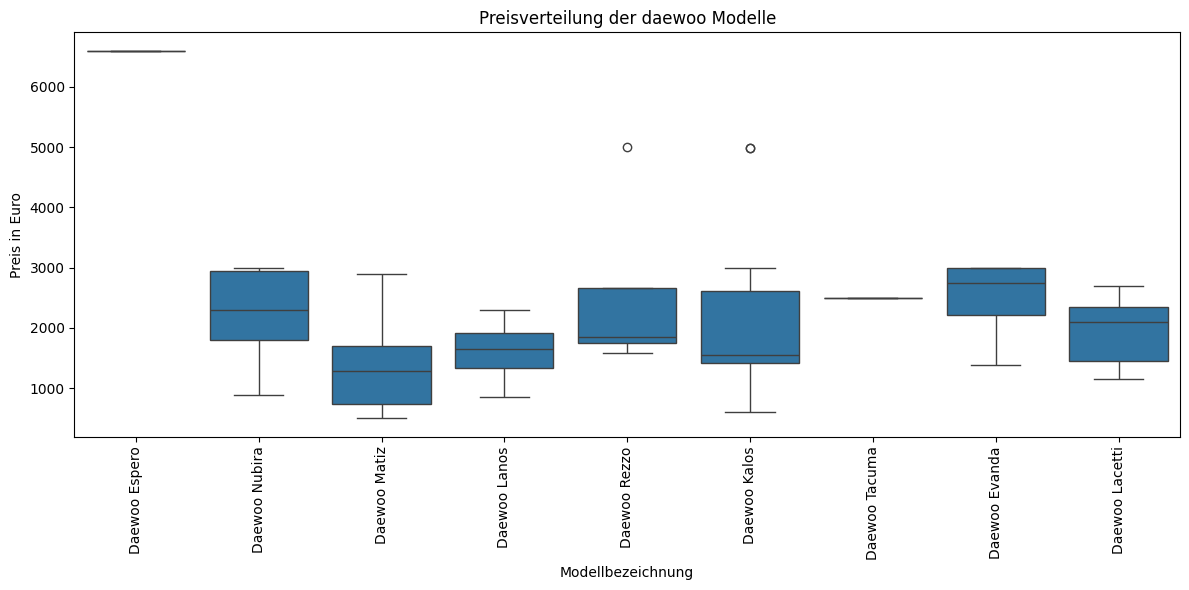

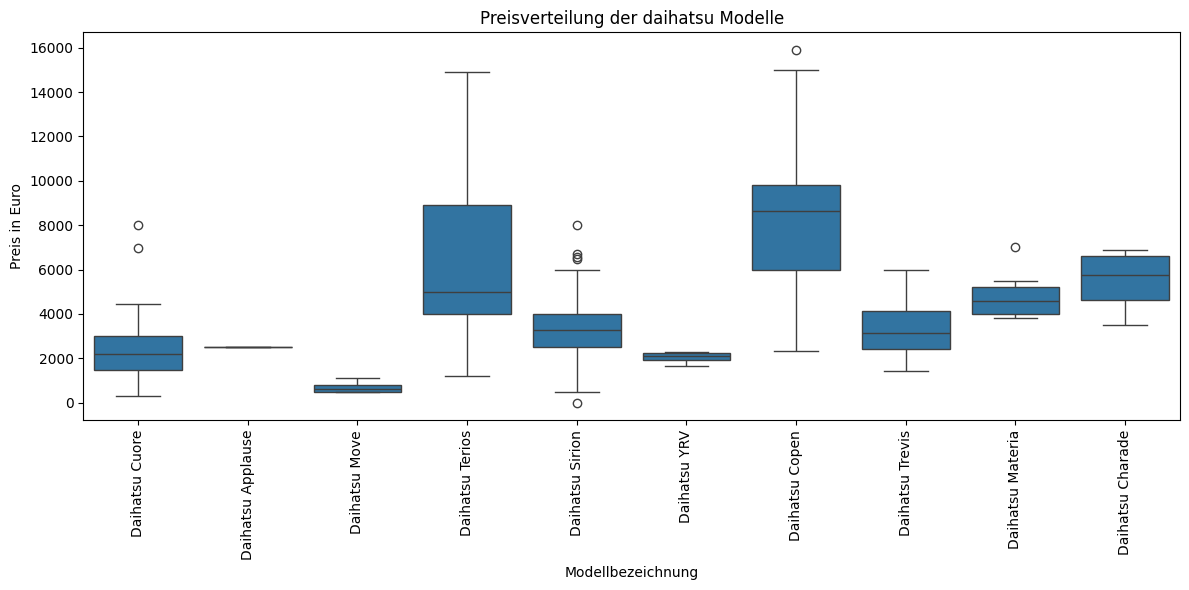

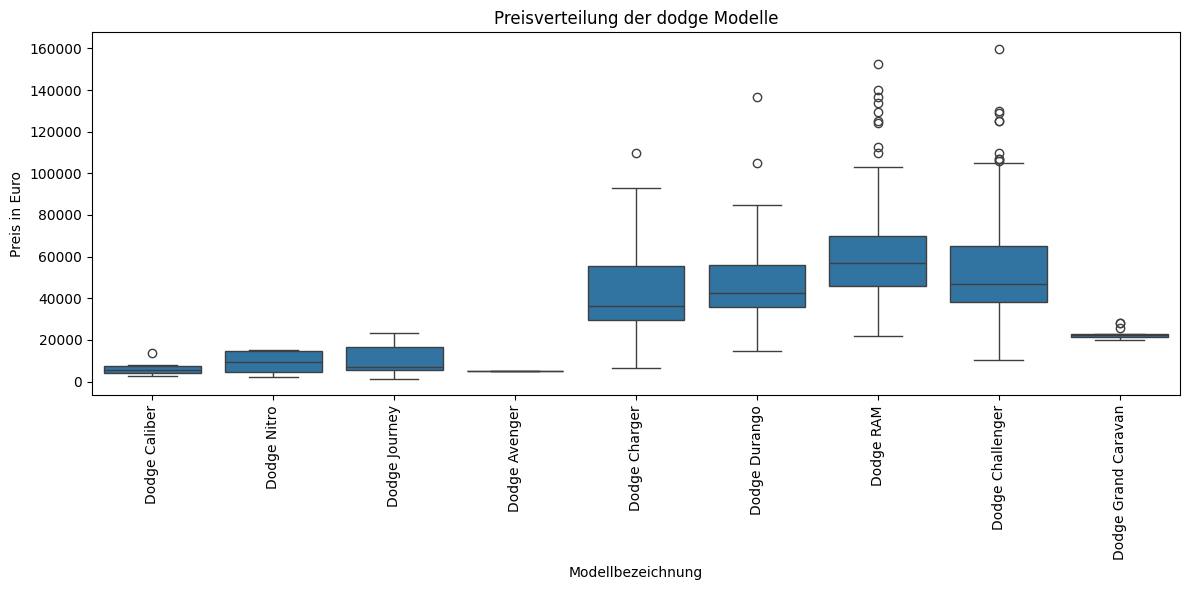

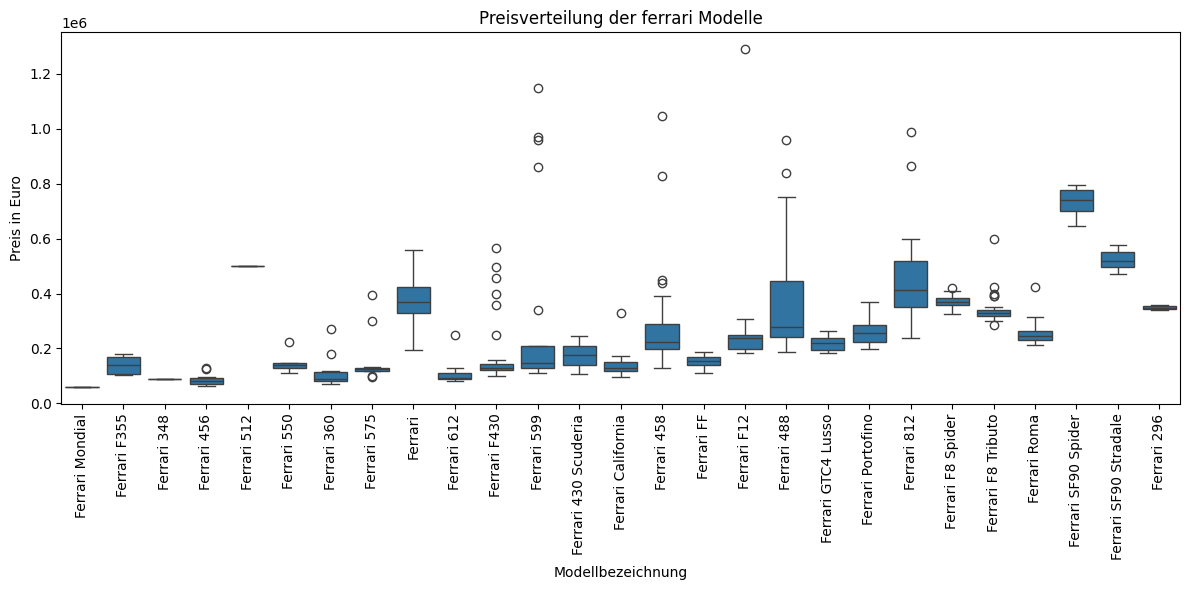

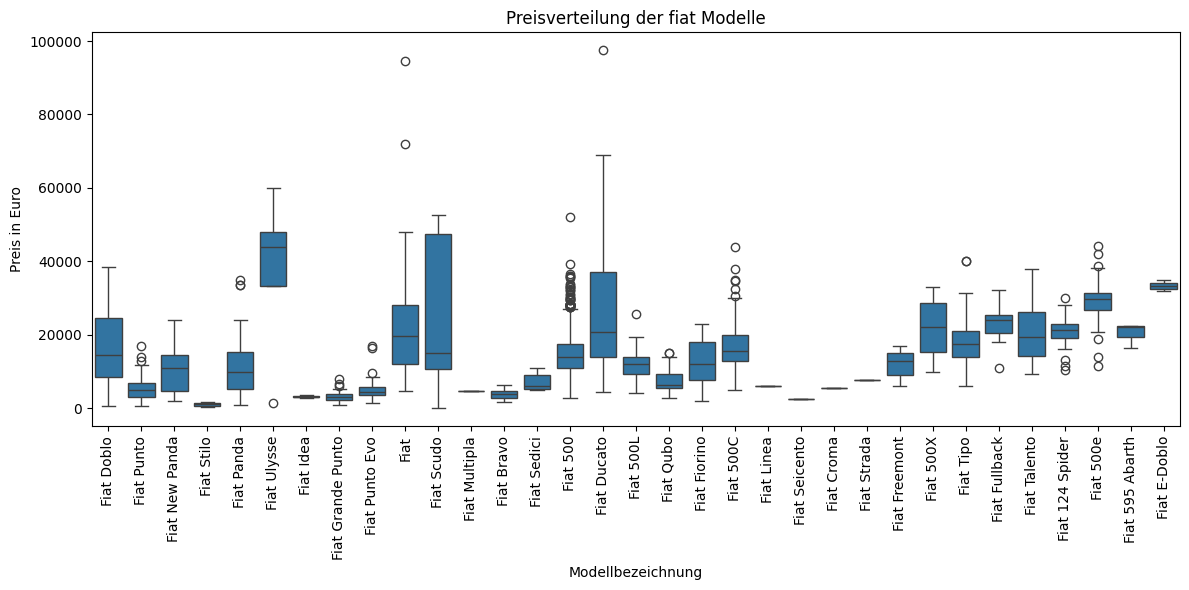

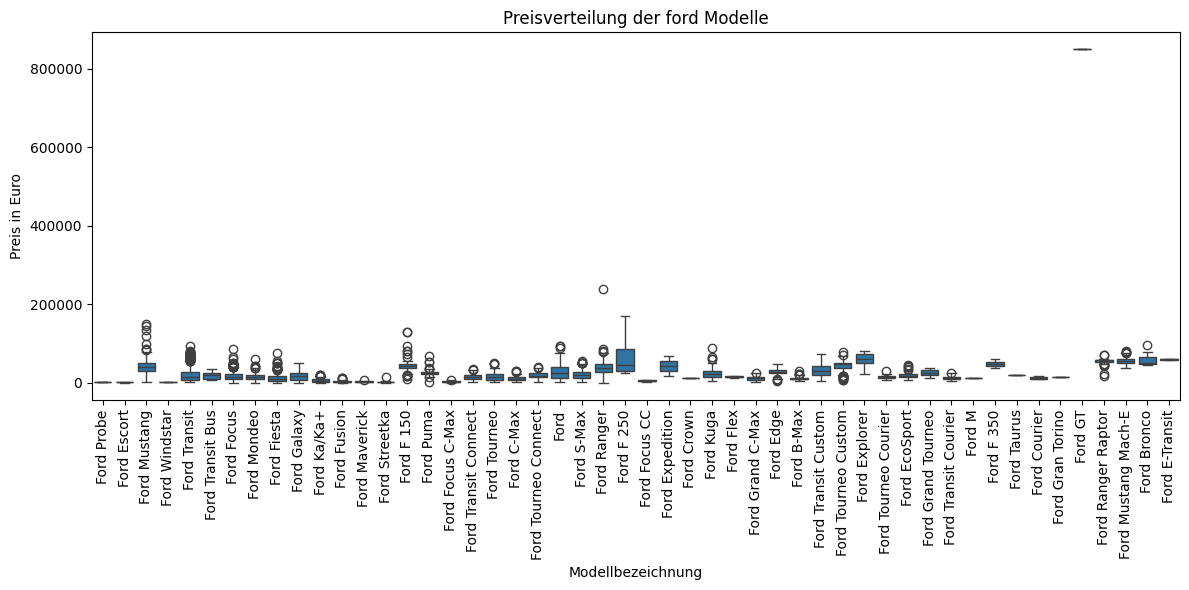

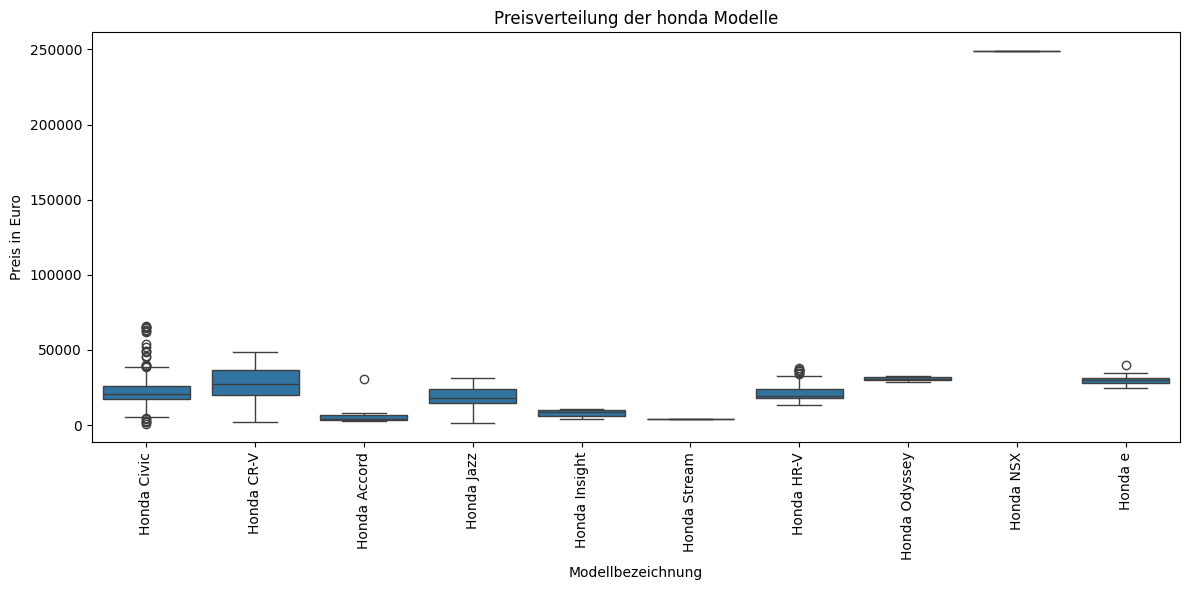

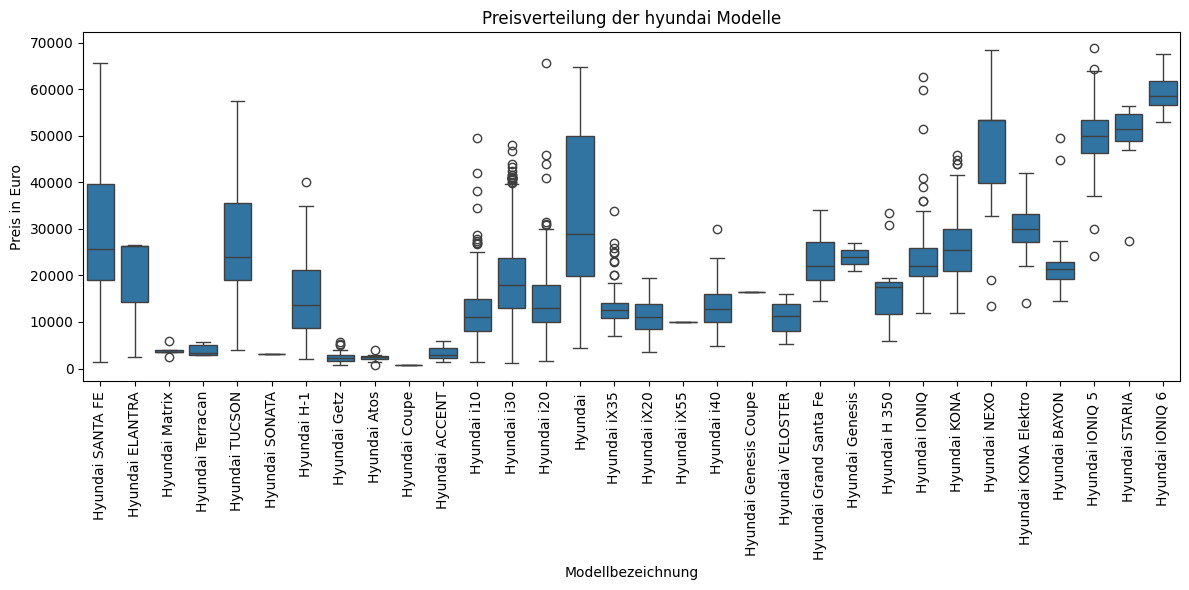

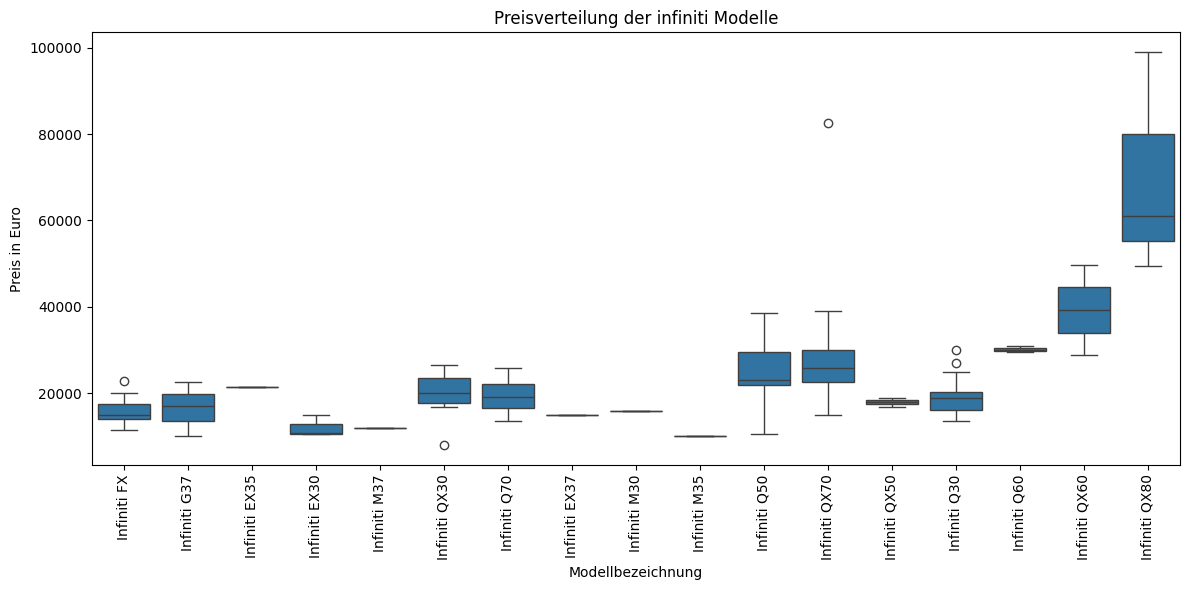

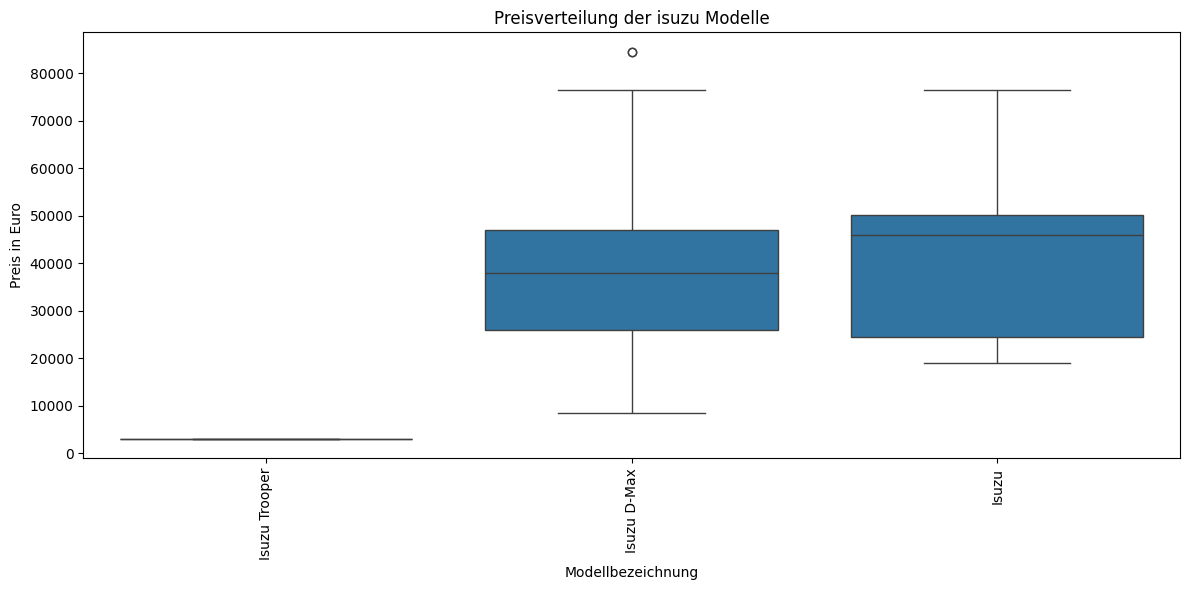

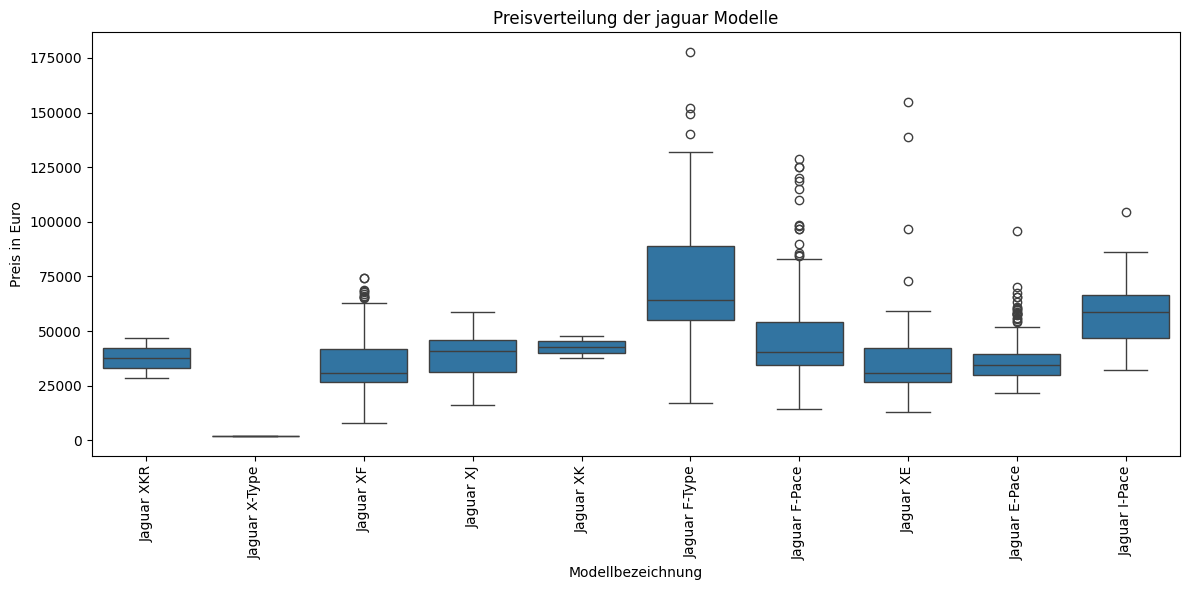

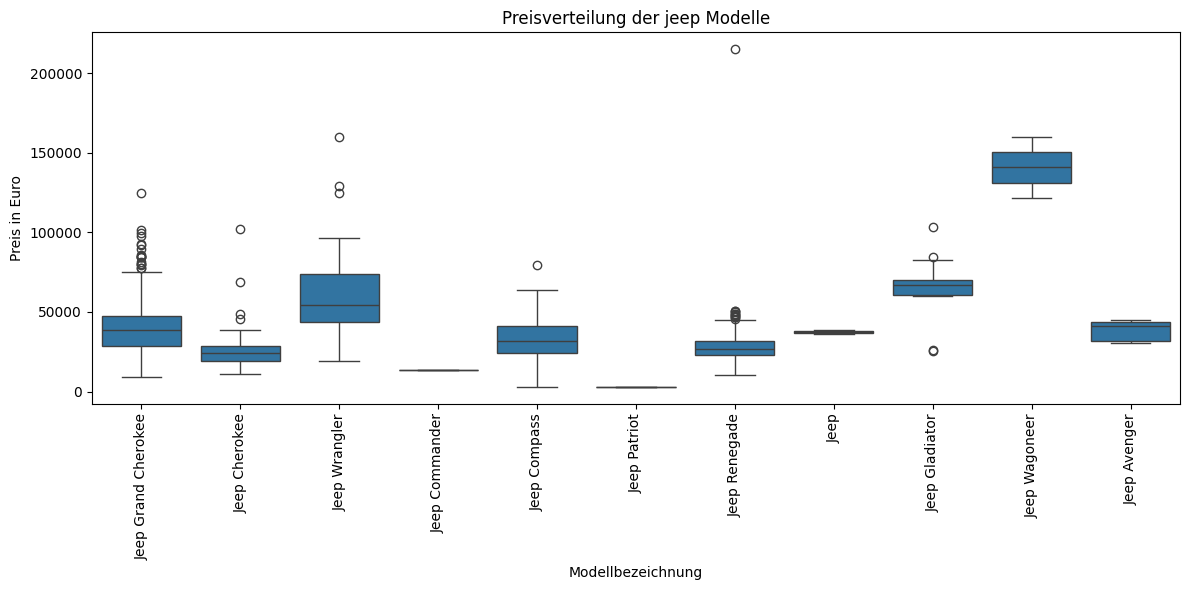

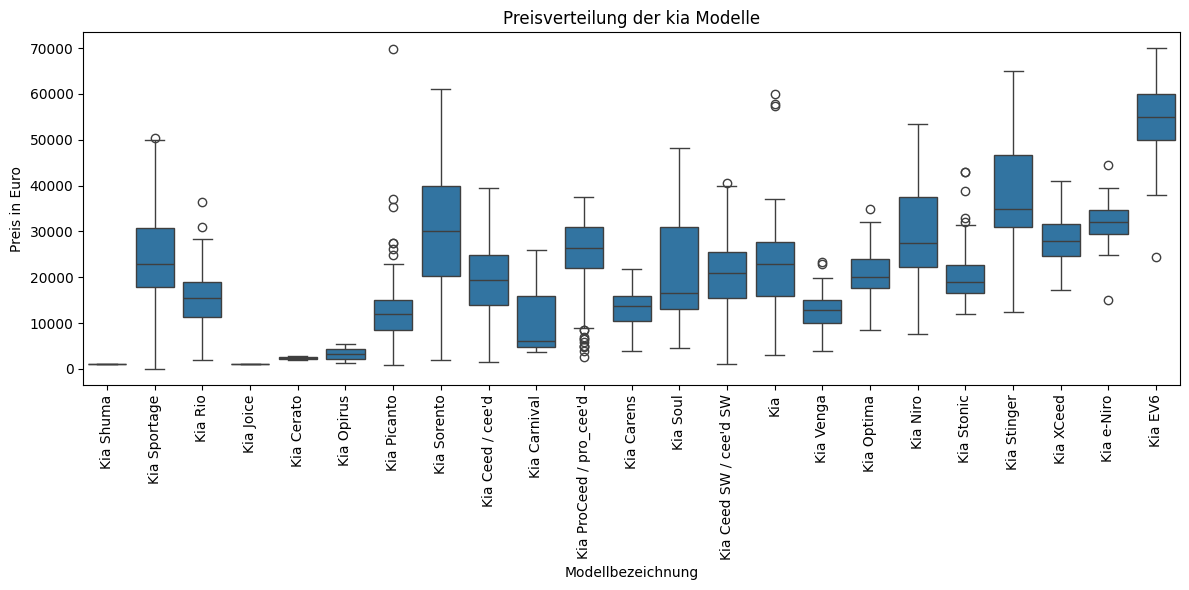

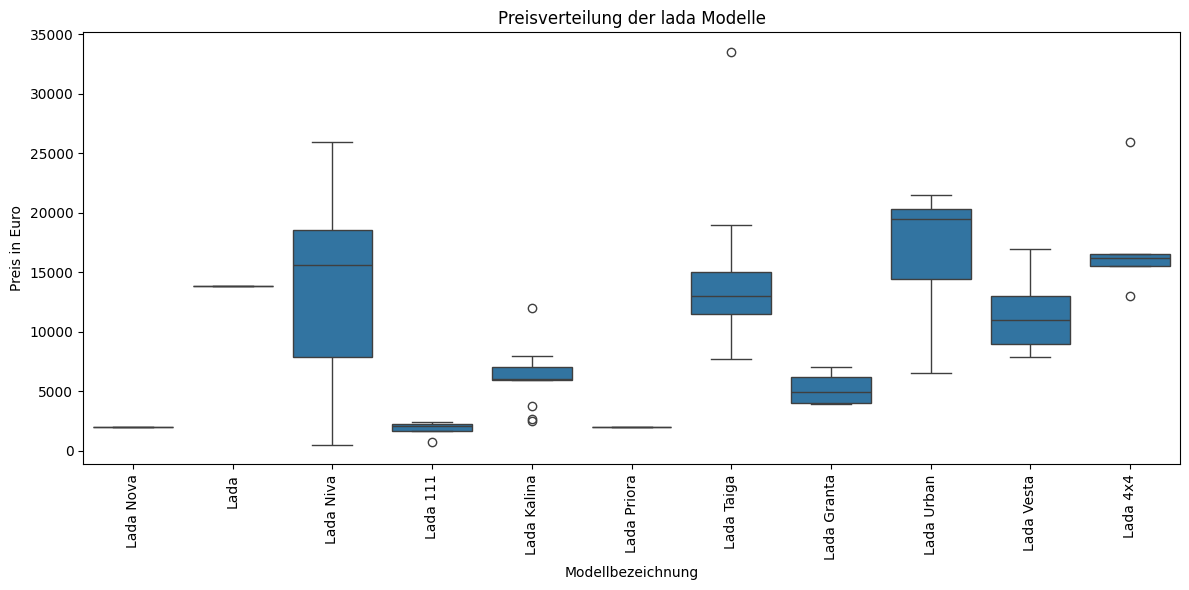

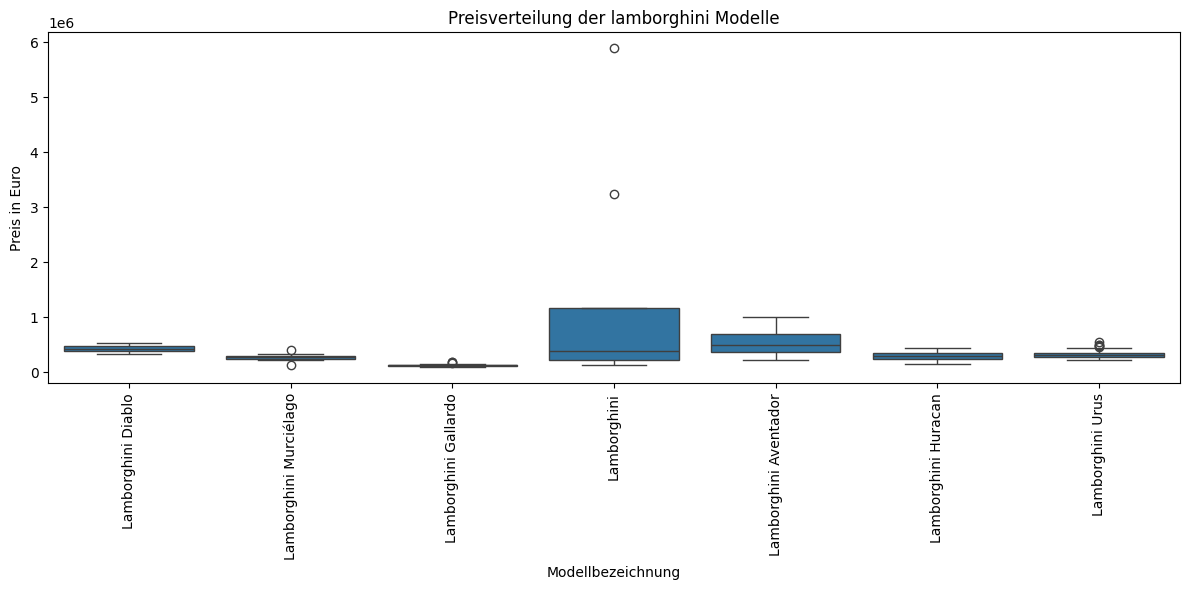

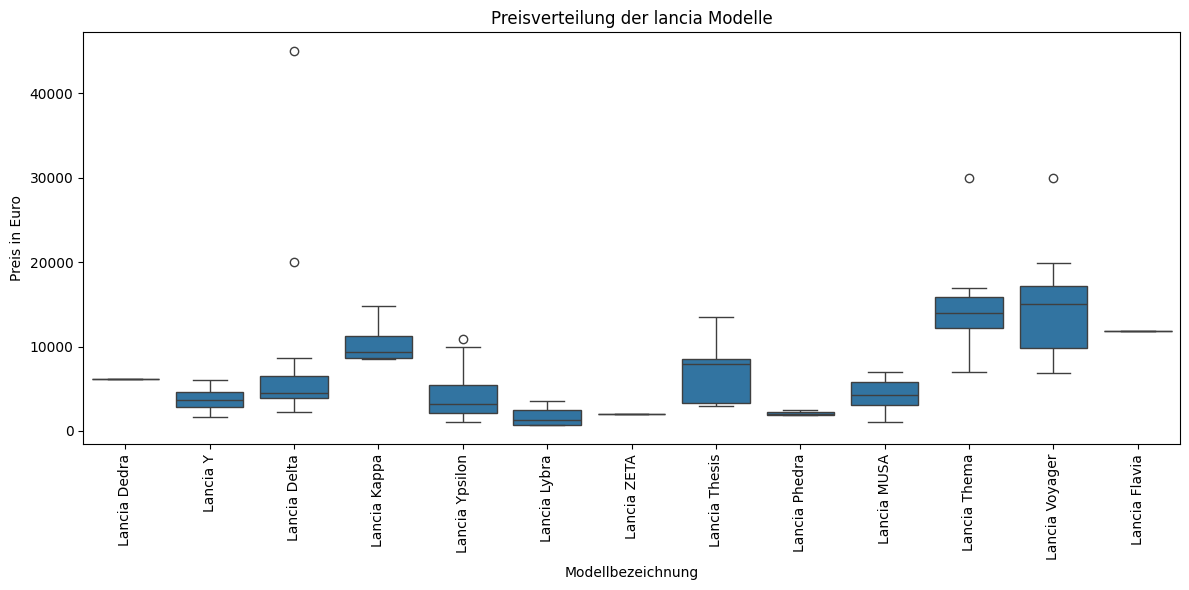

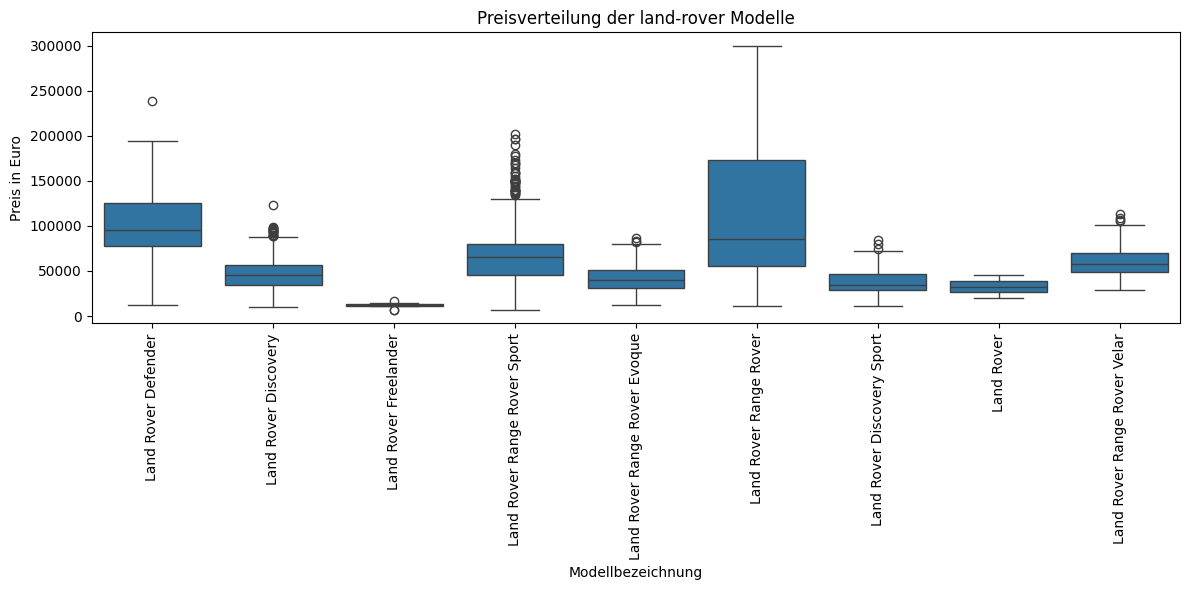

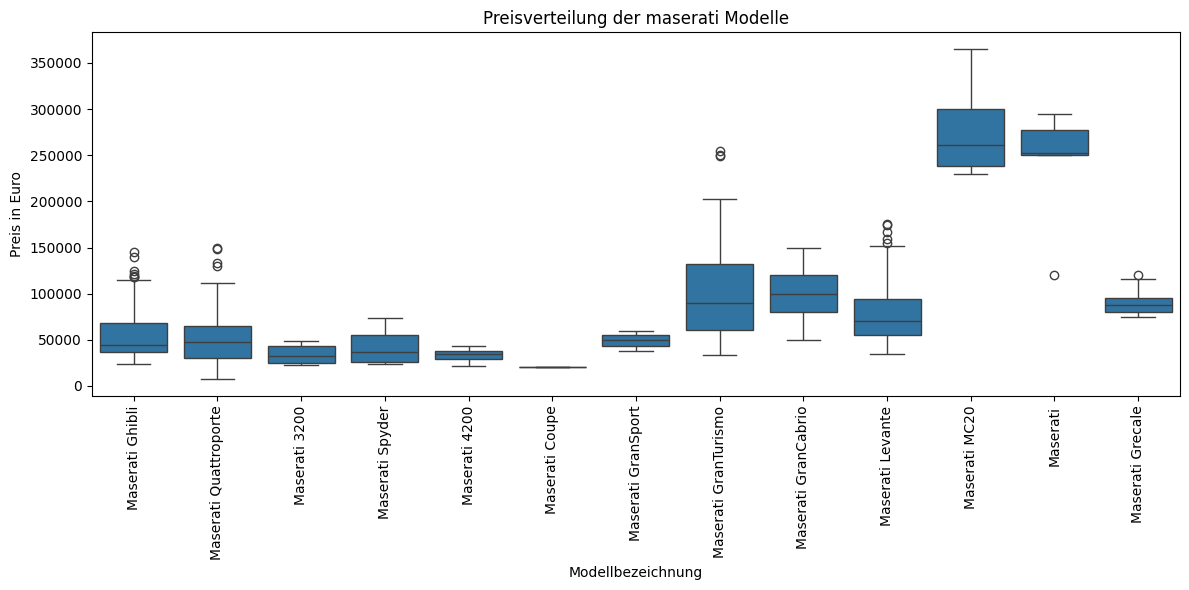

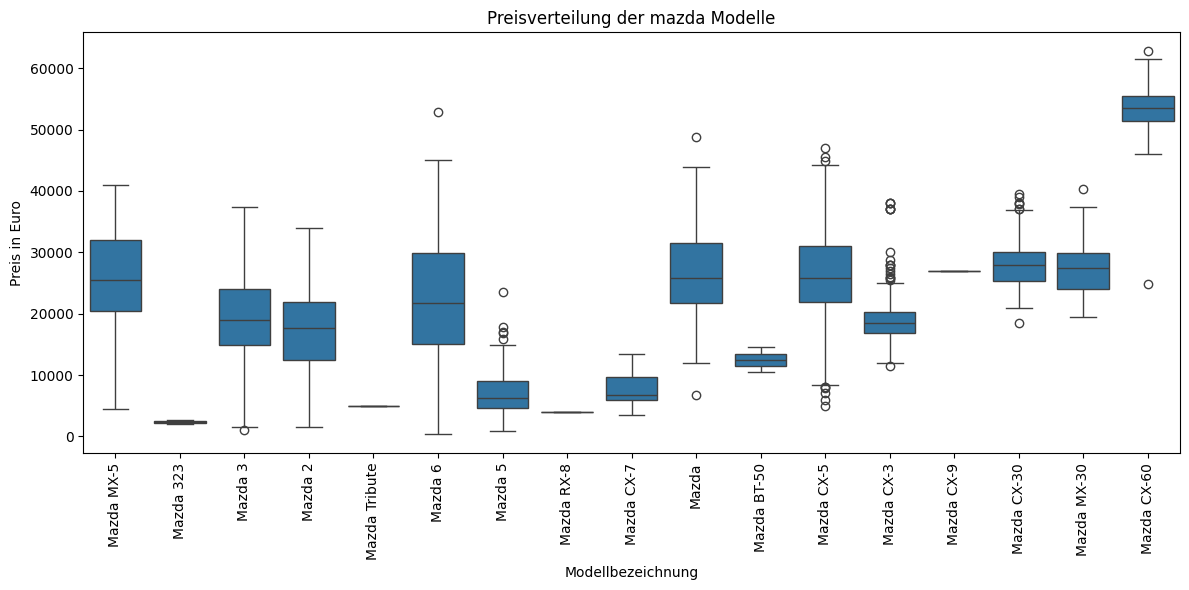

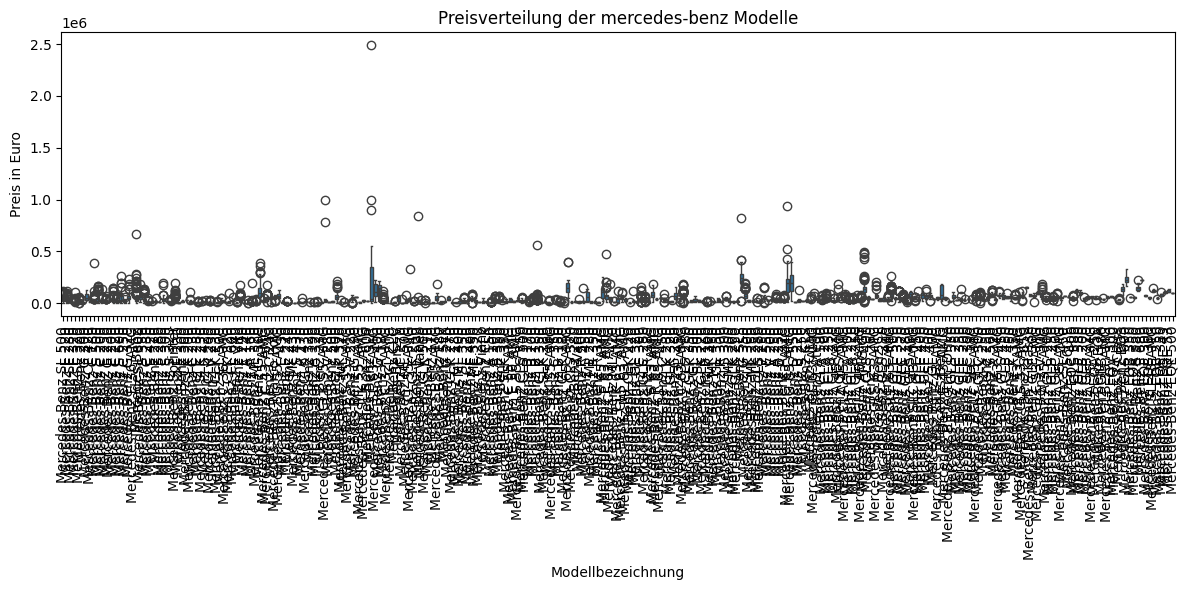

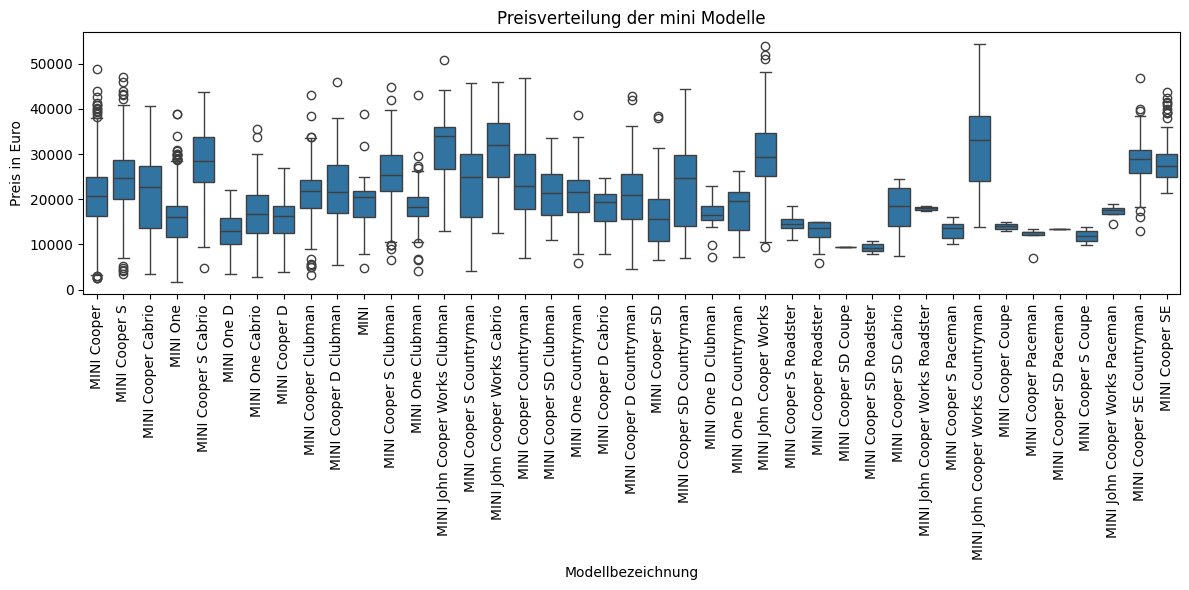

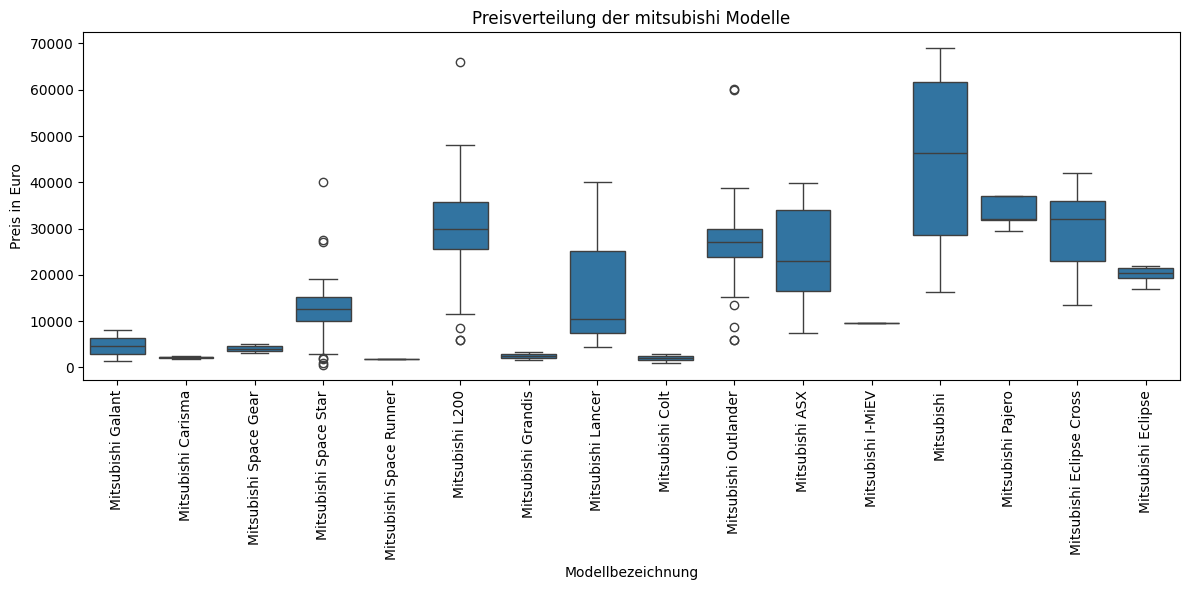

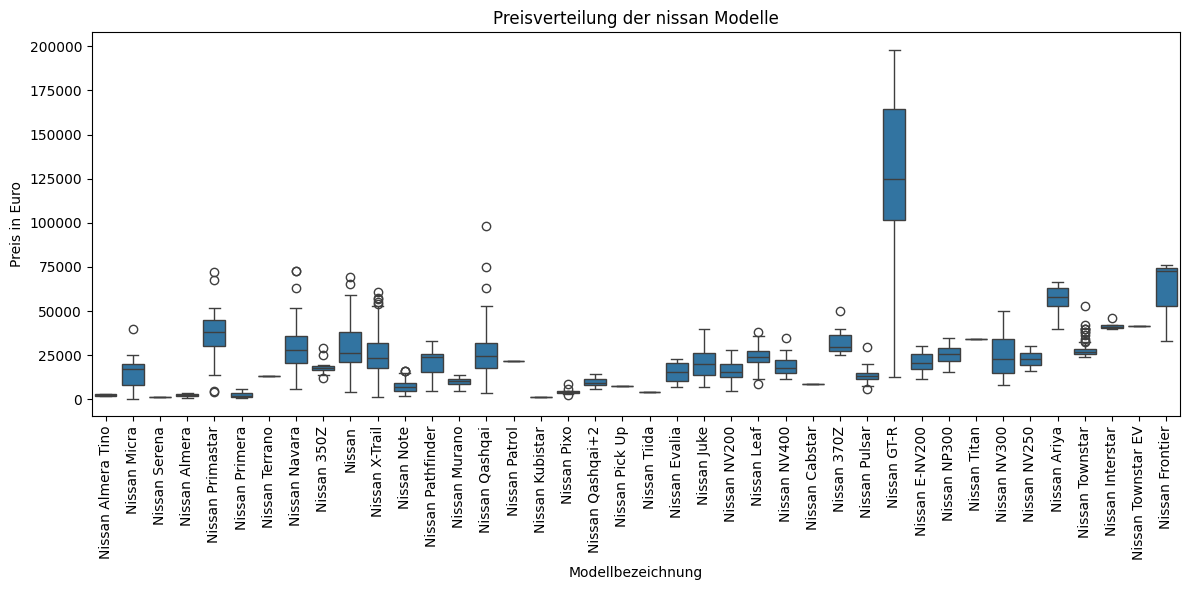

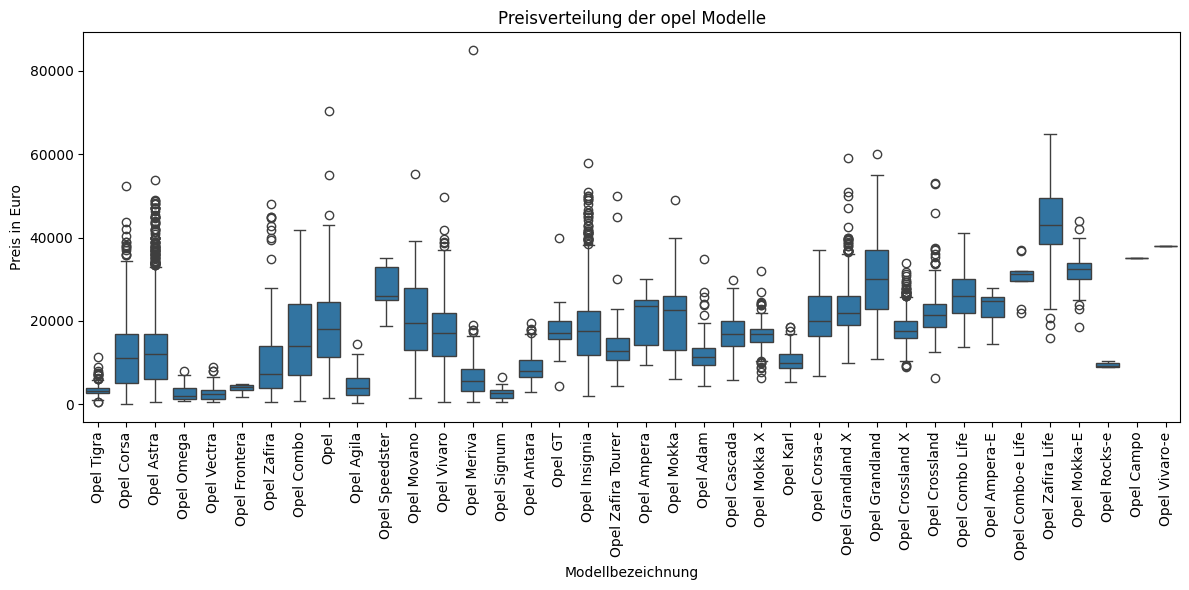

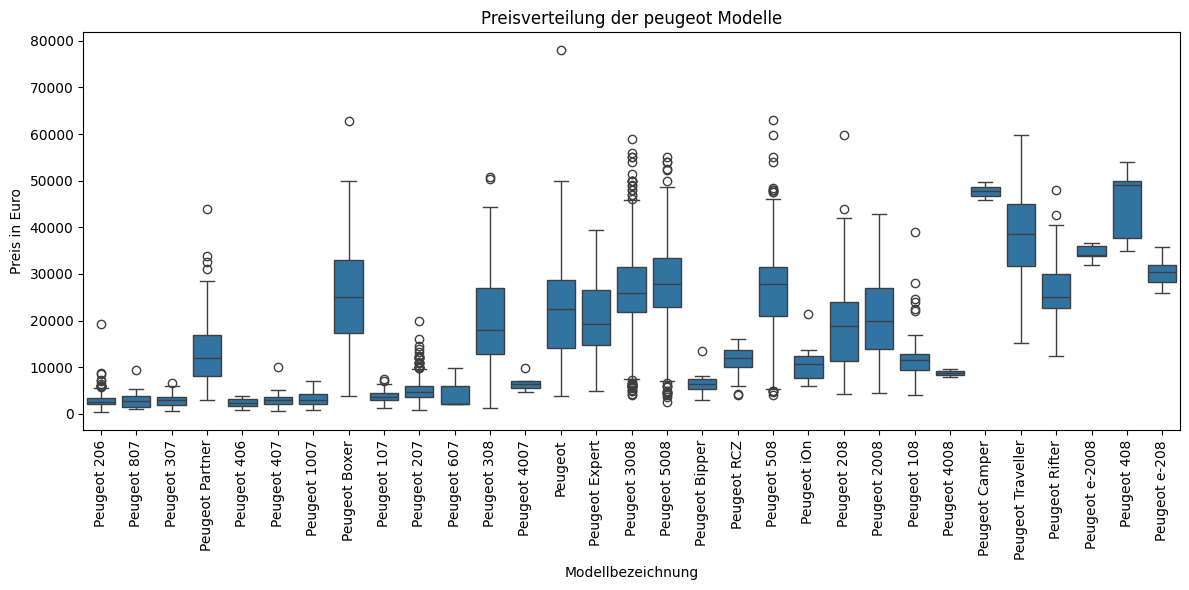

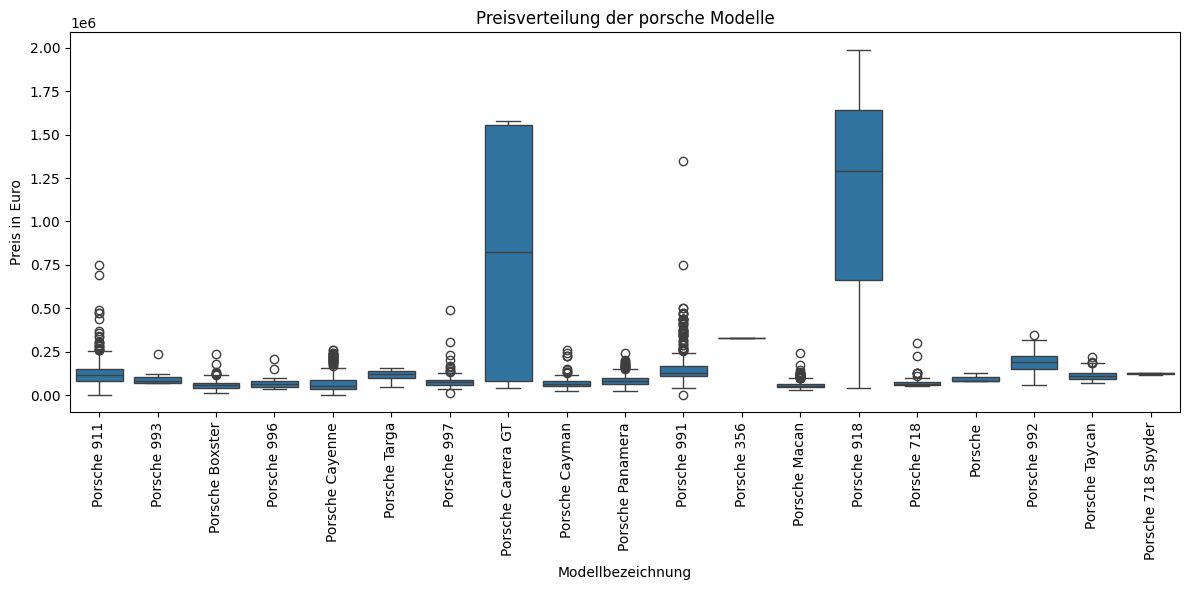

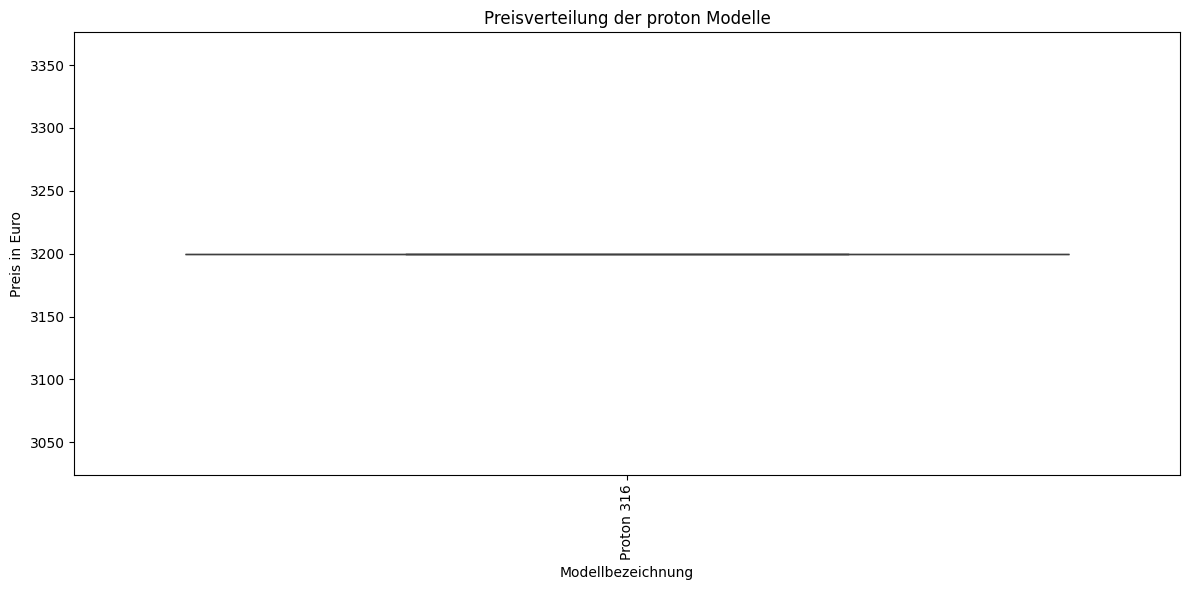

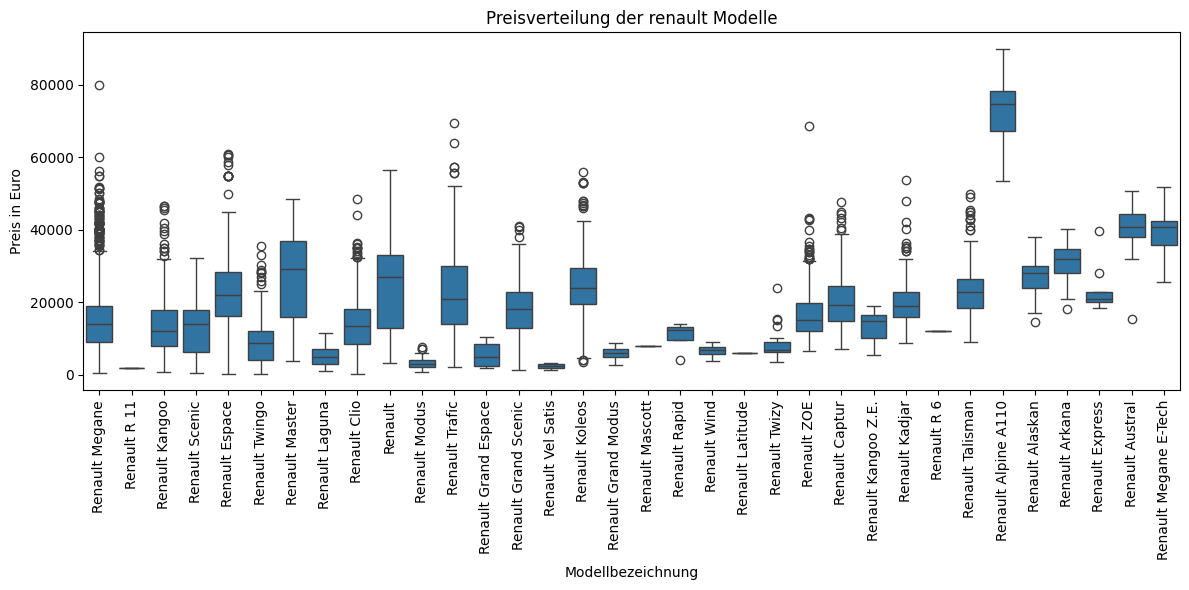

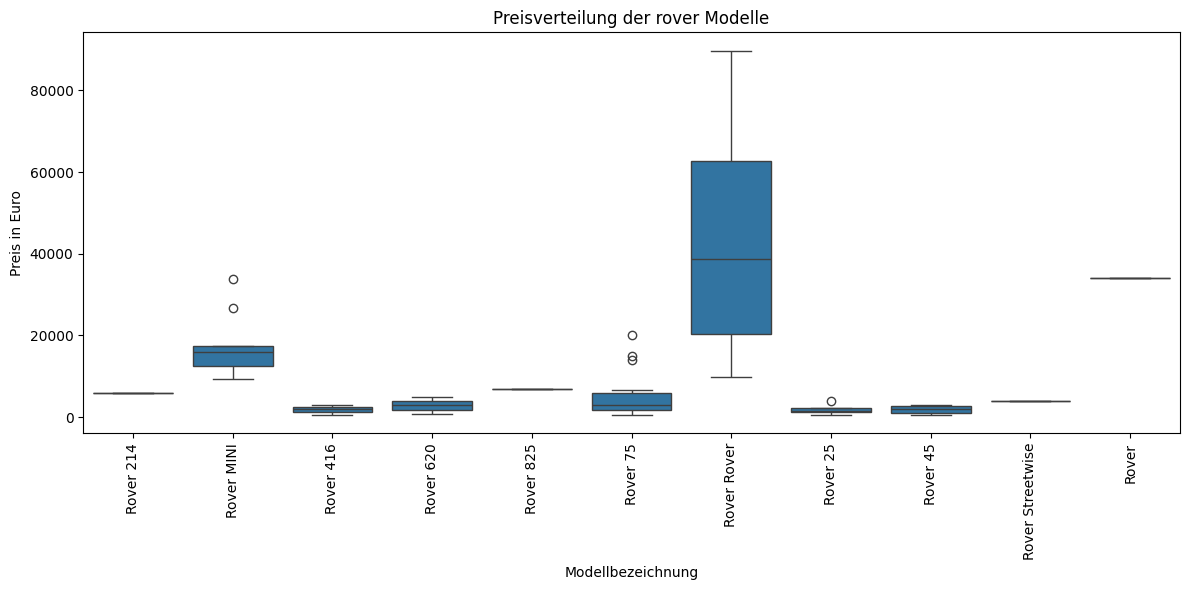

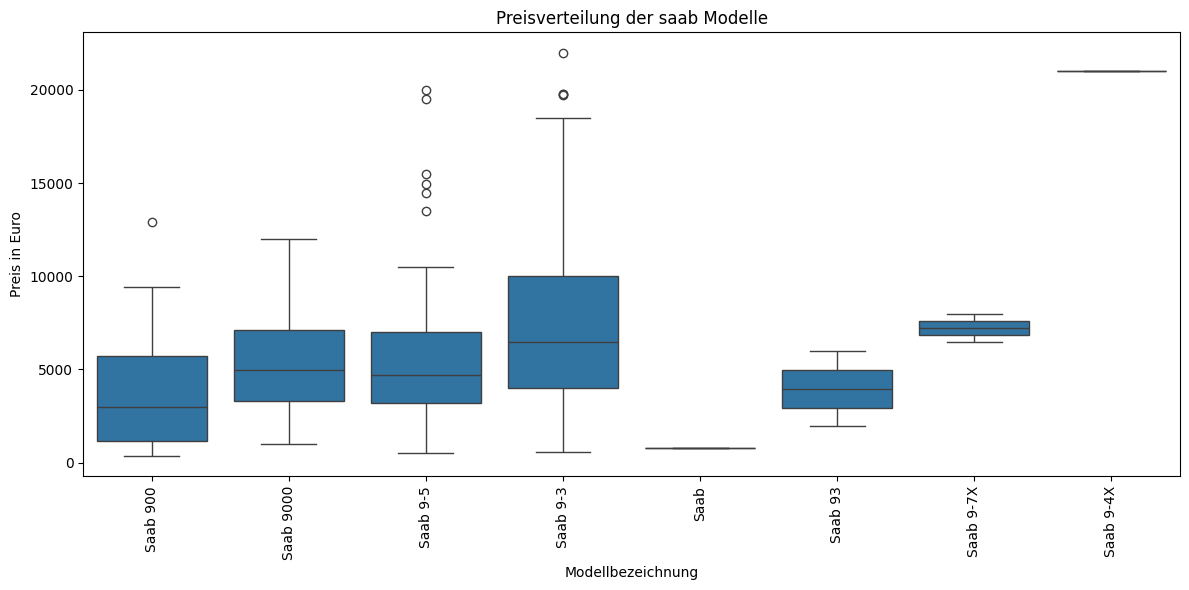

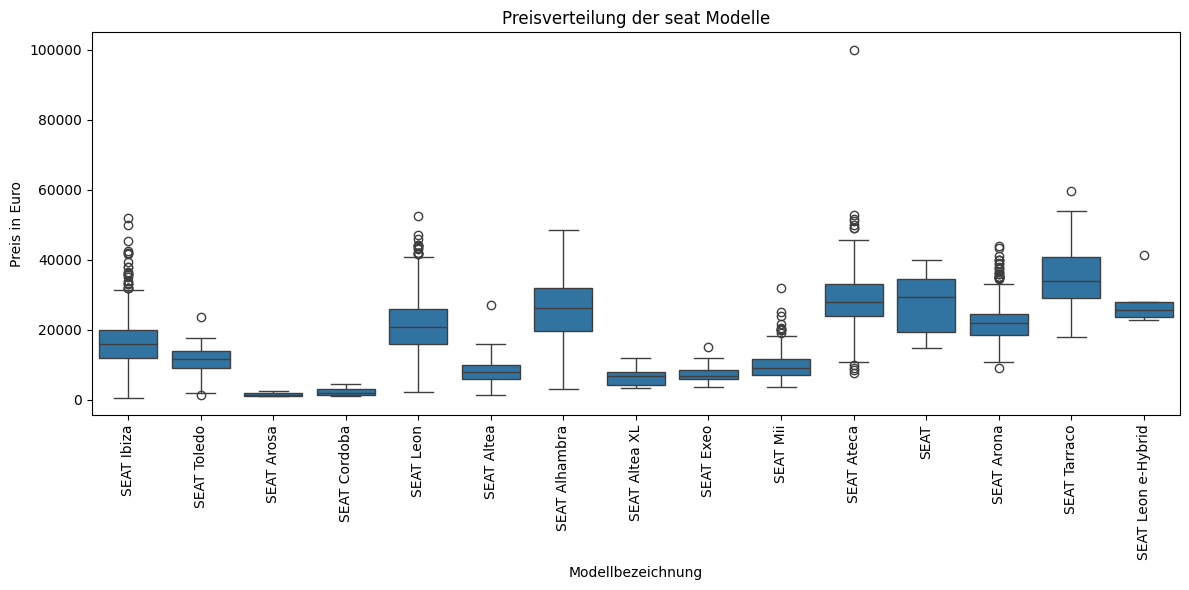

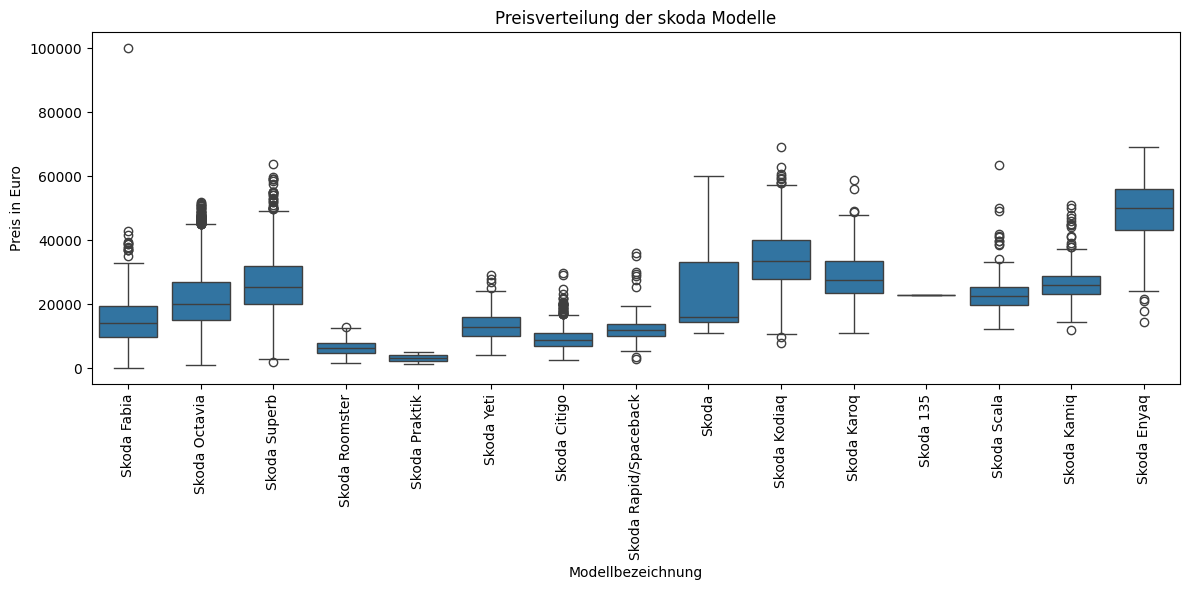

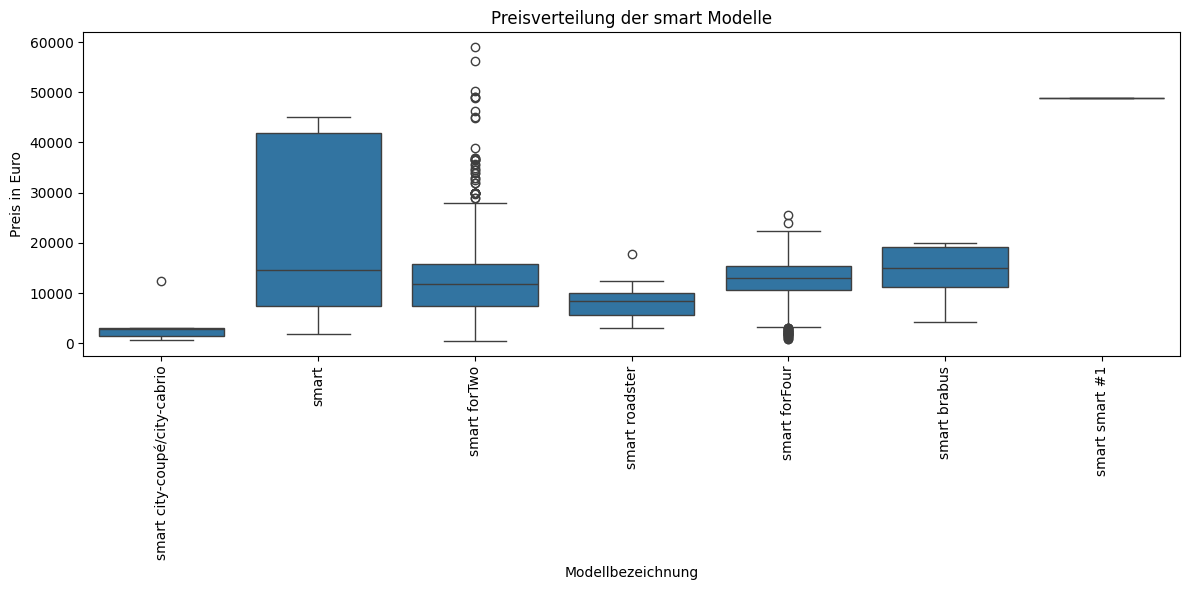

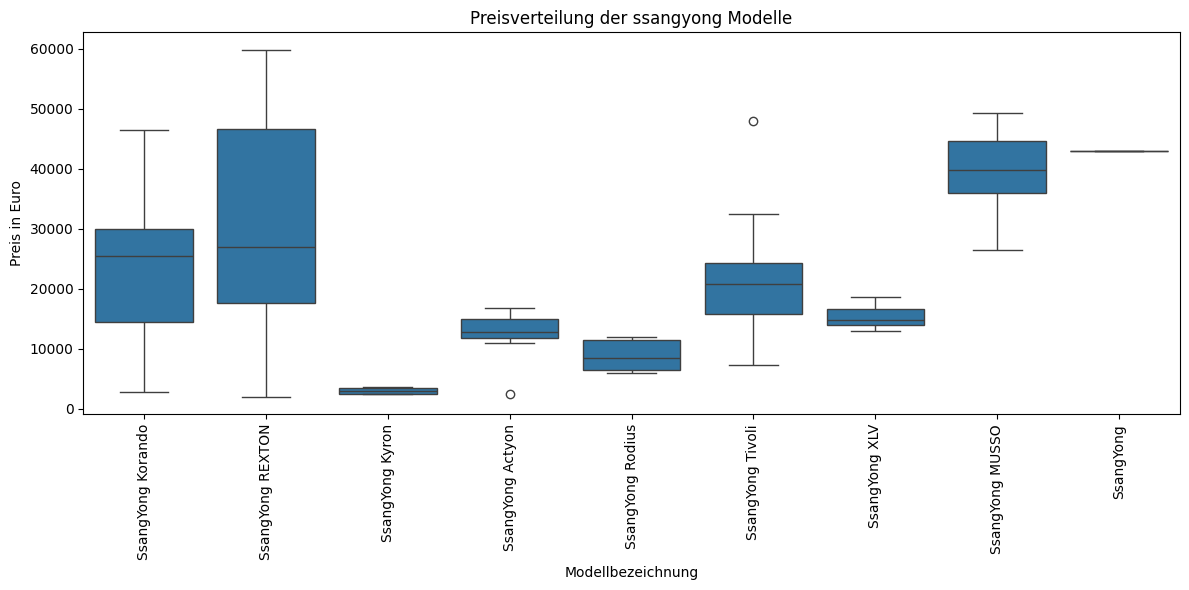

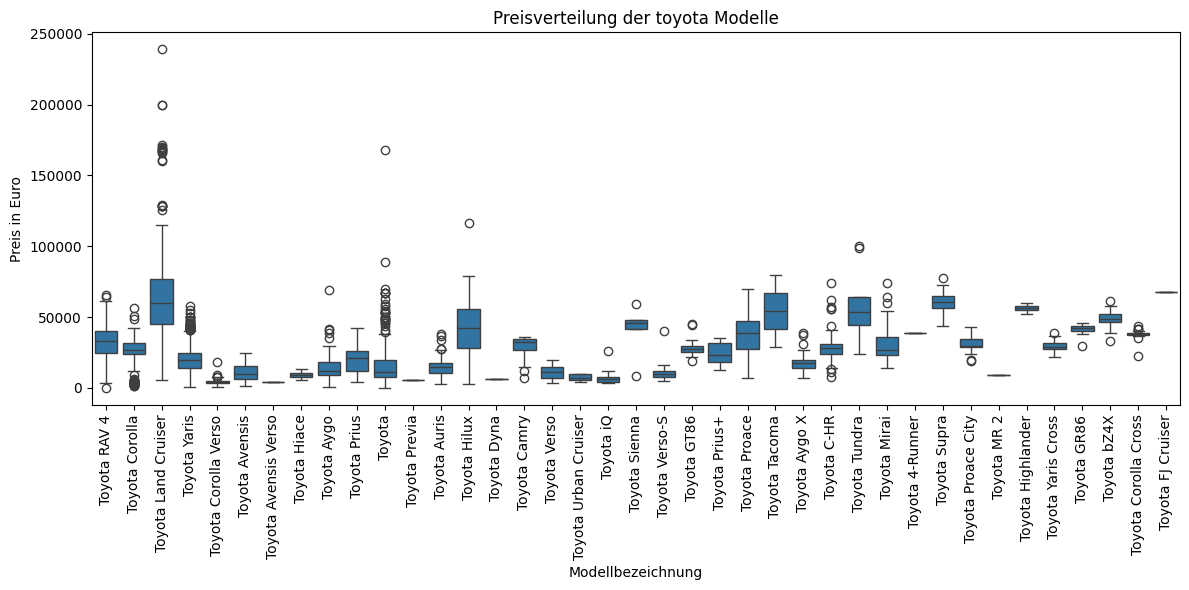

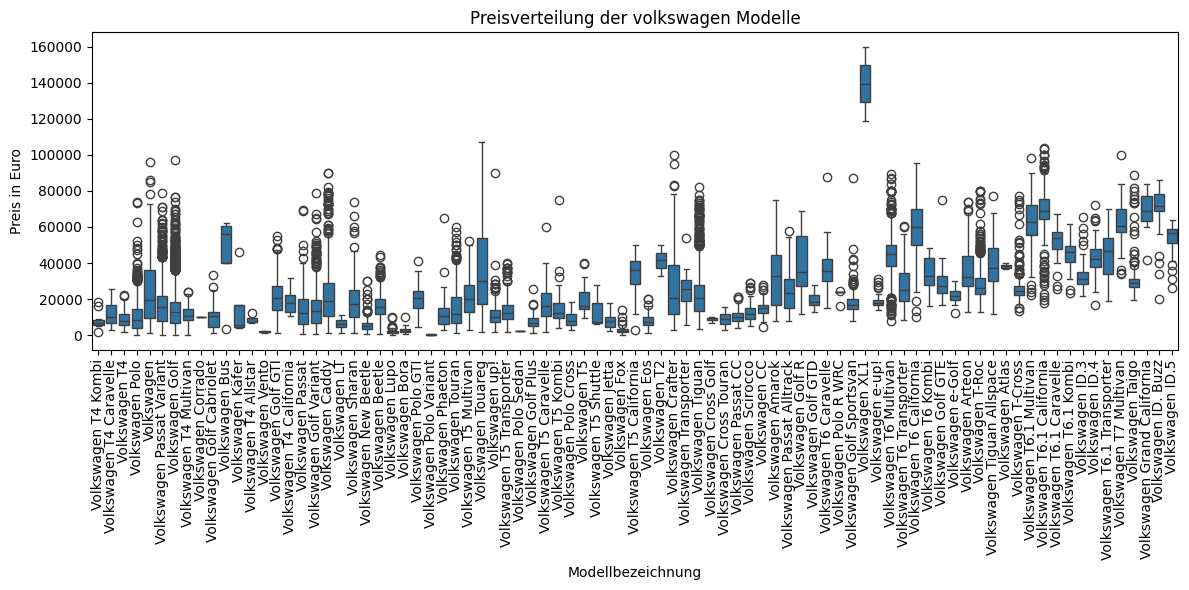

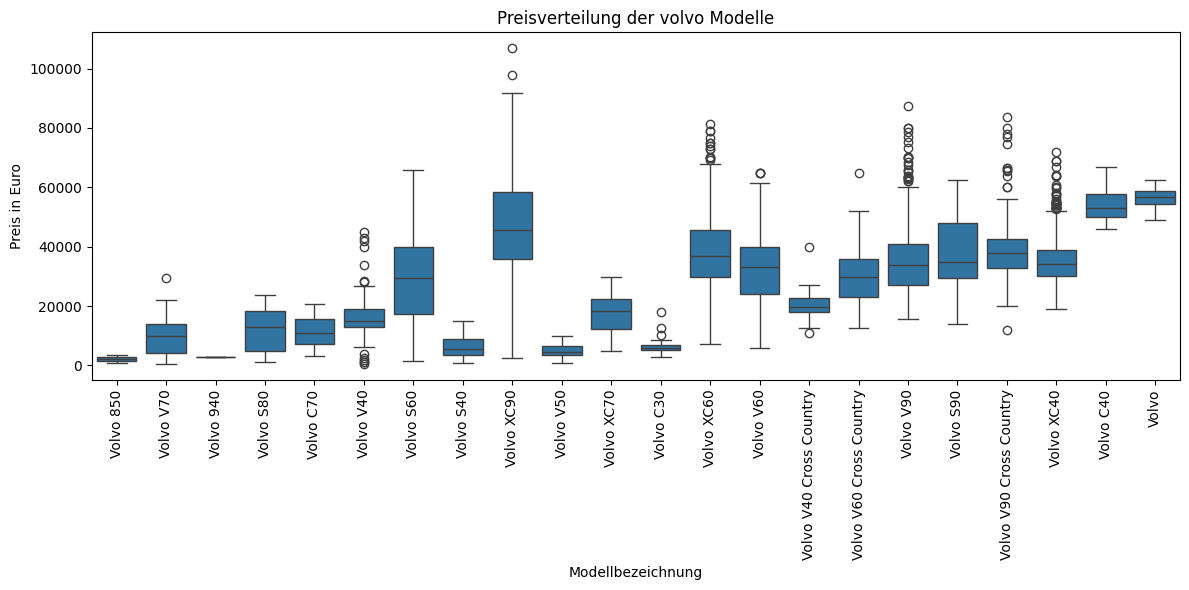

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Einfache Schleife, um für jede Marke ein Boxplot zu erstellen
for marke in df["brand"].unique():  # Für jede einzigartige Marke im DataFrame
    marken_df = df[df["brand"] == marke]  # Filtere nach der Marke
    
    # Boxplot für jedes Modell innerhalb der Marke
    plt.figure(figsize=(12, 6))  # Optional: Größe des Diagramms anpassen
    sns.boxplot(x="model", y="preis_bereinigt", data=marken_df)
    
    # Diagramm anpassen
    plt.xlabel('Modellbezeichnung')
    plt.ylabel('Preis in Euro')
    plt.title(f'Preisverteilung der {marke} Modelle')
    
    # Optional: Achsenbeschriftungen rotieren, wenn die Modellnamen lang sind
    plt.xticks(rotation=90)
    
    # Diagramm anzeigen
    plt.tight_layout()  # Verhindert, dass sich Beschriftungen überschneiden
    plt.show()


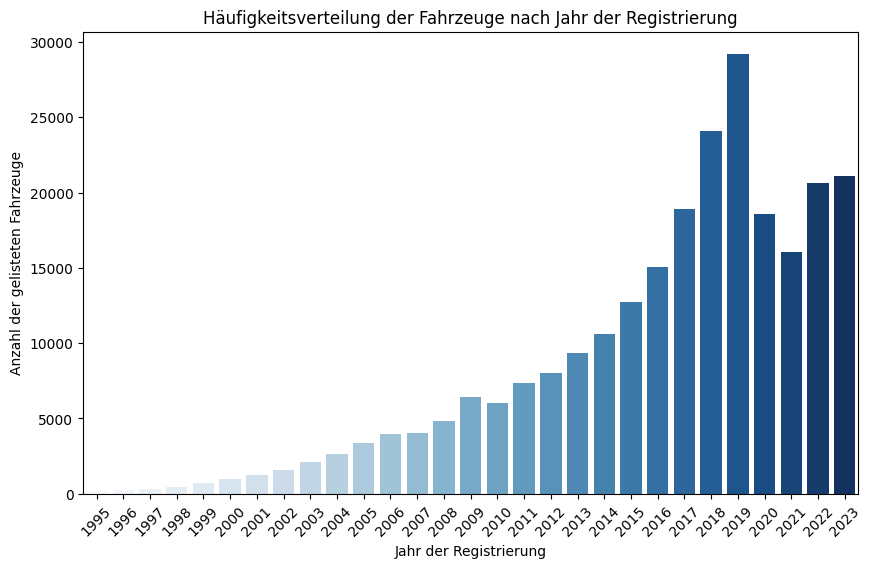

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Versuche, das Datum im Format "MM/YYYY" zu konvertieren
# Wenn das Format nicht stimmt, wird NaT (Not a Time) erzeugt und wir ersetzen diese mit NaN
df.loc[:, "registration_date_cleaned"] = pd.to_datetime(df["registration_date"], format="%m/%Y", errors="coerce")

# Lösche Zeilen mit NaT (ungültige Datumswerte)
df = df.dropna(subset=["registration_date_cleaned"])

# Jahr aus dem Datetime-Objekt extrahieren
df["year_registration"] = df["registration_date_cleaned"].dt.year

# Häufigkeit der Fahrzeuge nach Jahr der Registrierung berechnen
plt.figure(figsize=(10, 6))
sns.countplot(x="year_registration", data=df, hue="year_registration", palette="Blues", legend=False)

# Diagramm anpassen
plt.xlabel('Jahr der Registrierung')
plt.ylabel('Anzahl der gelisteten Fahrzeuge')
plt.title('Häufigkeitsverteilung der Fahrzeuge nach Jahr der Registrierung')

# Diagramm anzeigen
plt.xticks(rotation=45)  # Optional: Achsenbeschriftungen rotieren, falls nötig
plt.show()



color
black     58686
grey      46751
white     40587
silver    34332
blue      32070
red       21245
brown      4411
green      3498
orange     3365
beige      2418
yellow     1778
bronze      585
gold        580
violet      408
Name: count, dtype: int64


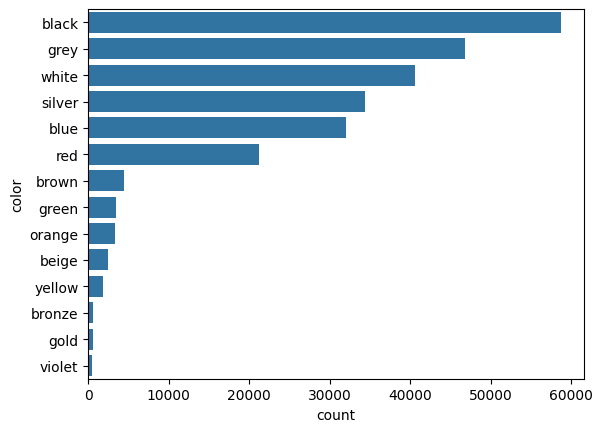

In [142]:
print(df["color"].value_counts())  # Häufigkeiten anzeigen
sns.countplot(y=df["color"], order=df["color"].value_counts().index)
plt.show()

In [148]:
# Umwandeln der power_ps-Spalte in numerisch (ungültige Werte werden als NaN behandelt)
df["power_ps_cleaned"] = pd.to_numeric(df["power_ps"], errors="coerce")

# Berechnung von min, max und Durchschnitt für jede Marke
power_stats = df.groupby("brand")["power_ps_cleaned"].agg(
    min_power="min", 
    max_power="max", 
    avg_power="mean"
).reset_index()

# Ausgabe der Ergebnisse
print(power_stats)


            brand  min_power  max_power   avg_power
0      alfa-romeo       14.0      540.0  209.345645
1    aston-martin      310.0      760.0  525.487365
2            audi       61.0      850.0  216.960944
3         bentley      320.0      710.0  567.219963
4             bmw       15.0      799.0  223.004448
5        cadillac      150.0      649.0  304.503185
6       chevrolet       52.0      751.0  351.717277
7        chrysler      184.0      401.0  290.656250
8         citroen        8.0      299.0  120.486261
9           dacia       26.0      150.0  101.703032
10         daewoo       52.0      133.0   89.573770
11       daihatsu       42.0      105.0   78.420792
12          dodge      140.0      851.0  400.170915
13        ferrari      300.0      999.0  629.668385
14           fiat       19.0      213.0   90.331875
15           ford       50.0      771.0  152.827880
16          honda       77.0      507.0  151.689172
17        hyundai       34.0      325.0  139.942853
18       inf

In [162]:
#Alfa Romeo 14 PS Minimum?
alfa_romeo_14 = df[(df["brand"]=="alfa-romeo") & (df["power_ps_cleaned"]==14.0)]
print(alfa_romeo_14)

#Renault Minimum?
renault_5 = df[(df["brand"]=="renault") & (df["power_ps_cleaned"]==5.0)]
print(renault_5)

      Unnamed: 0       brand              model  color registration_date  \
1395        1395  alfa-romeo  Alfa Romeo Tonale  black           01/2023   

      year price_in_euro power_kw power_ps transmission_type fuel_type  \
1395  2023         29970       10       14         Automatic    Hybrid   

     fuel_consumption_l_100km fuel_consumption_g_km  mileage_in_km  \
1395             5,9 l/100 km              134 g/km           10.0   

                     offer_description  preis_bereinigt  \
1395  SUPER 1.5 T 130PS 48-Hybrid 15KW          29970.0   

     registration_date_cleaned  year_registration  power_ps_cleaned  
1395                2023-01-01               2023              14.0  
        Unnamed: 0    brand          model color registration_date  year  \
169735      169735  renault  Renault Twizy   red           04/2012  2012   
174020      174020  renault  Renault Twizy  blue           04/2020  2020   
174680      174680  renault  Renault Twizy  blue           09/2021  20

In [168]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Liste der deutschen Stopwörter
german_stopwords = [
    "aber", "abgesehen", "alle", "allem", "allen", "alles", "als", "also", "am", "an", "andere", "anderen", "anderm", 
    "anderer", "anderes", "auch", "auf", "aus", "bei", "beide", "beiden", "beim", "beiner", "beim", "bis", "bisschen", 
    "bleiben", "durch", "ein", "eine", "einem", "einen", "einer", "eines", "er", "es", "essen", "etwas", "für", "gegen", 
    "geht", "habe", "haben", "hat", "hatte", "hätten", "hattest", "hattete", "hier", "hin", "hinter", "ich", "ihn", "ihm", 
    "ihr", "ihre", "immer", "in", "indem", "ins", "irgendwas", "ist", "ja", "jeder", "jeden", "jedes", "jedoch", "kann", 
    "kein", "keine", "konnte", "konnte", "machen", "mehr", "mit", "muss", "muss", "nach", "nicht", "nichts", "nur", "ob", 
    "oder", "ohne", "sehr", "sich", "sie", "sind", "so", "sollen", "sollte", "sondern", "um", "und", "uns", "unsere", 
    "vom", "von", "vor", "während", "weil", "wer", "werden", "wie", "wieder", "wieso", "wir", "wird", "wirst", "wo", 
    "woher", "wohin", "zu", "zum", "zur", "zwar", "zwischen"
]

# Bereinigen der 'offer description'-Spalte
df["offer_description_cleaned"] = df["offer_description"].str.replace(r'[^\w\s]', '', regex=True).str.lower()

# Erstellen eines CountVectorizer, der die deutschen Stopwörter verwendet
vectorizer = CountVectorizer(stop_words=german_stopwords, max_features=40)

# Anwendung des Vectorizers
X = vectorizer.fit_transform(df["offer_description_cleaned"])

# Erstellen einer DataFrame, um die Häufigkeit der Wörter zu sehen
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Berechnung der Häufigkeit jedes Schlagworts
word_count = word_freq.sum().sort_values(ascending=False)

# Ausgabe der häufigsten Schlagwörter und ihrer Häufigkeit
print(word_count)

navi         33394
20           25520
led          21232
tdi          20709
tsi          18780
dsg          14622
10           14563
pdc          13870
klima        12573
ahk          12111
15           11722
edition      11551
16           11368
12           10840
14           10740
shz          10618
style         9770
kamera        9297
sport         8689
hybrid        8480
acc           7858
line          7763
automatik     7209
leder         6859
quattro       6569
aut           6503
tfsi          6485
pano          6227
lim           5528
cdi           5473
4x4           5243
30            5219
combi         5091
turbo         4839
awd           4544
neu           4491
dpf           4385
fr            4319
tce           4275
dab           4184
dtype: int64
